In [1]:
cd ..

d:\min\research_projects\MedicalDataKit


In [61]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from MedDataKit.utils import column_check
from MedDataKit.prediction.prediction import train_and_evaluate_model, feature_importance

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# GENE3494


In [3]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.bioinfo_dataset import GENE3494Dataset

dataset = GENE3494Dataset()
data = dataset.load_raw_data()
data.head()

d:\min\research_projects\MedicalDataKit\data


,X208549_x_at,X218726_at,X205010_at,X205167_s_at,X218499_at,X218755_at,X208700_s_at,X212022_s_at,X209744_x_at,X205529_s_at,...,p53.DLDA_classifier_result,DLDA_error,Elston_histologic_grade,ER_status,PgR_status,age_at_diagnosis,tumor_size,Lymph_node_status,DSS_TIME,DSS_EVENT
0,9.652608,4.534097,5.450455,5.529036,6.026782,6.673681,7.938269,5.902719,6.742048,7.507050,...,0,0,G1,ER+,PgR-,68.0,9.0,LN-,11.833,0
1,10.056335,7.881263,6.052106,6.304284,8.234013,7.757034,8.471972,7.194986,7.012416,6.433154,...,1,0,G3,ER-,PgR-,40.0,12.0,LN-,11.833,0
2,10.177629,7.122940,6.113599,6.151927,6.590805,7.385494,8.930028,6.620997,7.062328,6.043174,...,1,0,G3,ER+,PgR+,51.0,26.0,LN-,11.833,0
3,9.853008,6.526893,5.540311,6.158005,7.146730,7.334246,8.701461,6.468184,6.848579,6.881921,...,0,1,G3,ER+,PgR+,80.0,24.0,LN?,3.583,0
4,9.718894,5.959421,5.842536,5.295576,5.960042,7.184604,7.473179,5.873209,6.428933,7.338783,...,0,0,G1,ER+,PgR+,46.0,13.0,LN-,11.750,0


In [19]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_dss_event', 
    config = {'numerical_encoding': 'standard', 'missing_strategy': 'impute', 'categorical_encoding': 'ordinal'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

['predict_dss_event']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (236, 73)
After setting target feature:  (236, 73)
After feature engineering:  (236, 73)
After handling missing data:  (236, 73)
Final ml task dataset shape:  (236, 73)
Task name: predict_dss_event  Task type: classification
Target: DSS_EVENT Num classes: 2 (classes: {0: 181, 1: 55})
Data Shape: (236, 73) (num 65 cat 7)
Missing ratio:  0.0%
Feature Groups:
None
(150, 72) (38, 72) (150,) (38,)
Accuracy: 0.8542
F1 Score: 0.6316
ROC AUC: 0.9017
PR AUC: 0.7872


,X208549_x_at,X218726_at,X205010_at,X205167_s_at,X218499_at,X218755_at,X208700_s_at,X212022_s_at,X209744_x_at,X205529_s_at,...,tumor_size,DSS_TIME,p53_seq_mut_status,p53.DLDA_classifier_result,DLDA_error,Elston_histologic_grade,ER_status,PgR_status,Lymph_node_status,DSS_EVENT
0,0.589663,0.227858,0.287721,0.521595,0.212113,0.605156,0.346636,0.486929,0.337564,0.799454,...,0.111111,0.928078,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0
1,0.753668,1.000000,0.596235,0.737342,0.777604,0.851981,0.541648,0.773987,0.523968,0.356759,...,0.158730,0.928078,0.0,1.0,0.0,2.0,1.0,1.0,1.0,0
2,0.802941,0.825066,0.627768,0.694942,0.356615,0.767332,0.709019,0.646484,0.558380,0.195997,...,0.380952,0.928078,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0
3,0.671071,0.687567,0.333797,0.696633,0.499043,0.755656,0.625502,0.612539,0.411012,0.541756,...,0.349206,0.281020,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0
4,0.616590,0.556659,0.488772,0.456625,0.195014,0.721562,0.176694,0.480374,0.121688,0.730089,...,0.174603,0.921569,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0.717596,0.236051,0.532843,0.419476,0.374097,0.000000,0.314800,0.372639,0.437482,0.862308,...,0.238095,0.888863,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
232,0.716729,0.749974,0.573398,0.768971,0.276674,0.799754,0.890617,0.565479,0.502291,0.131349,...,0.380952,0.209176,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0
233,0.781947,0.668813,0.583056,0.553993,0.414580,0.652972,0.375477,0.572503,0.656942,0.473130,...,0.571429,0.019608,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
234,0.771219,0.572635,0.329302,0.428910,0.456149,0.655311,0.365844,0.542669,0.276768,0.506066,...,0.269841,0.823529,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [18]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_dss_event', 
    config = {'numerical_encoding': 'standard', 'missing_strategy': 'impute', 'categorical_encoding': 'onehot'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

['predict_dss_event']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (236, 73)
After setting target feature:  (236, 73)
After feature engineering:  (236, 73)
After handling missing data:  (236, 73)
Final ml task dataset shape:  (236, 77)
Task name: predict_dss_event  Task type: classification
Target: DSS_EVENT Num classes: 2 (classes: {0: 181, 1: 55})
Data Shape: (236, 77) (num 65 cat 11)
Missing ratio:  0.0%
Feature Groups:
None
(150, 76) (38, 76) (150,) (38,)
Accuracy: 0.8542
F1 Score: 0.6316
ROC AUC: 0.8771
PR AUC: 0.7212


,X208549_x_at,X218726_at,X205010_at,X205167_s_at,X218499_at,X218755_at,X208700_s_at,X212022_s_at,X209744_x_at,X205529_s_at,...,DLDA_error_1,Elston_histologic_grade_G2,Elston_histologic_grade_G3,Elston_histologic_grade_G?,ER_status_ER-,ER_status_ER?,PgR_status_PgR-,Lymph_node_status_LN-,Lymph_node_status_LN?,DSS_EVENT
0,0.589663,0.227858,0.287721,0.521595,0.212113,0.605156,0.346636,0.486929,0.337564,0.799454,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,0.753668,1.000000,0.596235,0.737342,0.777604,0.851981,0.541648,0.773987,0.523968,0.356759,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0
2,0.802941,0.825066,0.627768,0.694942,0.356615,0.767332,0.709019,0.646484,0.558380,0.195997,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.671071,0.687567,0.333797,0.696633,0.499043,0.755656,0.625502,0.612539,0.411012,0.541756,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.616590,0.556659,0.488772,0.456625,0.195014,0.721562,0.176694,0.480374,0.121688,0.730089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0.717596,0.236051,0.532843,0.419476,0.374097,0.000000,0.314800,0.372639,0.437482,0.862308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
232,0.716729,0.749974,0.573398,0.768971,0.276674,0.799754,0.890617,0.565479,0.502291,0.131349,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
233,0.781947,0.668813,0.583056,0.553993,0.414580,0.652972,0.375477,0.572503,0.656942,0.473130,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
234,0.771219,0.572635,0.329302,0.428910,0.456149,0.655311,0.365844,0.542669,0.276768,0.506066,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


# Zigong Heart Failure


In [42]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import ZigongHeartFailureDataset

dataset = ZigongHeartFailureDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,...,Drug_24,Drug_25,outcome.during.hospitalization,death.within.28.days,death.within.3.months,death.within.6.months,re.admission.within.28.days,re.admission.within.3.months,re.admission.within.6.months,return.to.emergency.department.within.6.months
0,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1.0,Male,36.7,87.0,19.0,...,1.0,0.0,Alive,0,0,0,0,0,0,0.0
1,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1.0,Female,36.8,95.0,18.0,...,0.0,0.0,Alive,0,0,0,0,0,0,0.0
2,Home,Cardiology,NonEmergency,farmer,Cardiology,2.0,Male,36.5,98.0,18.0,...,0.0,0.0,Alive,0,0,0,0,0,0,0.0
3,Home,Cardiology,Emergency,UrbanResident,Cardiology,1.0,Male,36.0,73.0,19.0,...,0.0,0.0,Alive,0,0,0,1,1,1,1.0
4,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1.0,Female,35.0,88.0,19.0,...,0.0,0.0,Alive,0,0,0,0,0,0,0.0


In [43]:
print(dataset.get_task_names())

['predict_outcome', 'predict_death_30', 'predict_death_90', 'predict_death_180', 'predict_readmission_30', 'predict_readmission_90', 'predict_readmission_180', 'predict_readmission_ed']


In [59]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_outcome', 
    config = {
        'numerical_encoding': 'standard', 
        'missing_strategy': 'impute', 
        'ordinal_as_numerical': True, 
        'categorical_encoding': 'ordinal'
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (2007, 190)
After setting target feature:  (2007, 183)
After feature engineering:  (2007, 177)
After handling missing data:  (1806, 161)
Final ml task dataset shape:  (1806, 159)
Task name: predict_outcome  Task type: classification
Target: outcome.during.hospitalization Num classes: 3 (classes: {0: 1702, 2: 97, 1: 7})
Data Shape: (1806, 159) (num 105 cat 53)
Missing ratio:  0.0%
Feature Groups:
    - demongraphic: 9 features (e.g., ageCat,weight,height ... occupation,gender,admission.ward)
    - clinical_status: 17 features (e.g., eye.opening,left.ventricular.end.diastolic.diameter.LV,respiratory.support. ... mitral.valve.EMS,pulse,GCS)
    - comorbidity: 16 features (e.g., diabetes,AIDS,Chronic.obstructive.pulmonary.disease ... CCI.score,peripheral.vascular.disease,myocardial.infarcti

,visit.times,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,...,Drug_17,Drug_18,Drug_19,Drug_20,Drug_21,Drug_22,Drug_23,Drug_24,Drug_25,outcome.during.hospitalization
0,0.00,0.242857,0.439394,0.527778,0.485714,0.492308,0.511111,0.434783,0.871622,0.046006,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.00,0.257143,0.479798,0.500000,0.714286,0.538462,0.644444,0.443478,0.864865,0.047504,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.25,0.214286,0.494949,0.500000,0.485714,0.515385,0.524444,0.608696,0.912162,0.059942,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3,0.00,0.142857,0.368687,0.527778,0.523810,0.569231,0.573333,0.565217,0.912162,0.055660,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4,0.00,0.000000,0.444444,0.527778,0.638095,0.476923,0.573333,0.660870,0.810811,0.078285,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,0.00,0.214286,0.505051,0.527778,0.704762,0.692308,0.728889,0.456522,0.797297,0.055502,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2002,0.00,0.157143,0.590909,0.611111,0.571429,0.615385,0.622222,0.304348,0.777027,0.038496,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
2004,0.00,0.257143,0.570707,0.527778,0.642857,0.769231,0.744444,0.652174,0.912162,0.064224,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2005,0.00,0.200000,0.676768,0.527778,0.438095,0.553846,0.524444,0.347826,0.777027,0.043996,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [60]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_outcome', 
    config = {
        'numerical_encoding': 'standard', 
        'missing_strategy': 'impute', 
        'ordinal_as_numerical': True, 
        'categorical_encoding': 'onehot'
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (2007, 190)
After setting target feature:  (2007, 183)
After feature engineering:  (2007, 177)
After handling missing data:  (1806, 161)
Final ml task dataset shape:  (1806, 178)
Task name: predict_outcome  Task type: classification
Target: outcome.during.hospitalization Num classes: 3 (classes: {0: 1702, 2: 97, 1: 7})
Data Shape: (1806, 178) (num 105 cat 72)
Missing ratio:  0.0%
Feature Groups:
    - demongraphic: 21 features (e.g., visit.times,admission.ward_2,BMI ... weight,occupation_3,gender_1)
    - clinical_status: 24 features (e.g., respiratory.support._1,type.of.heart.failure_2,respiration ... type.of.heart.failure_1,left.ventricular.end.diastolic.diameter.LV,Killip.grade_2)
    - comorbidity: 16 features (e.g., myocardial.infarction_1,diabetes_1,dementia_1 ... congestive.heart.

,visit.times,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,...,Drug_17_1,Drug_18_1,Drug_19_1,Drug_20_1,Drug_21_1,Drug_22_1,Drug_23_1,Drug_24_1,Drug_25_1,outcome.during.hospitalization
0,0.00,0.242857,0.439394,0.527778,0.485714,0.492308,0.511111,0.434783,0.871622,0.046006,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.00,0.257143,0.479798,0.500000,0.714286,0.538462,0.644444,0.443478,0.864865,0.047504,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.25,0.214286,0.494949,0.500000,0.485714,0.515385,0.524444,0.608696,0.912162,0.059942,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3,0.00,0.142857,0.368687,0.527778,0.523810,0.569231,0.573333,0.565217,0.912162,0.055660,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4,0.00,0.000000,0.444444,0.527778,0.638095,0.476923,0.573333,0.660870,0.810811,0.078285,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,0.00,0.214286,0.505051,0.527778,0.704762,0.692308,0.728889,0.456522,0.797297,0.055502,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2002,0.00,0.157143,0.590909,0.611111,0.571429,0.615385,0.622222,0.304348,0.777027,0.038496,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
2004,0.00,0.257143,0.570707,0.527778,0.642857,0.769231,0.744444,0.652174,0.912162,0.064224,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2005,0.00,0.200000,0.676768,0.527778,0.438095,0.553846,0.524444,0.347826,0.777027,0.043996,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


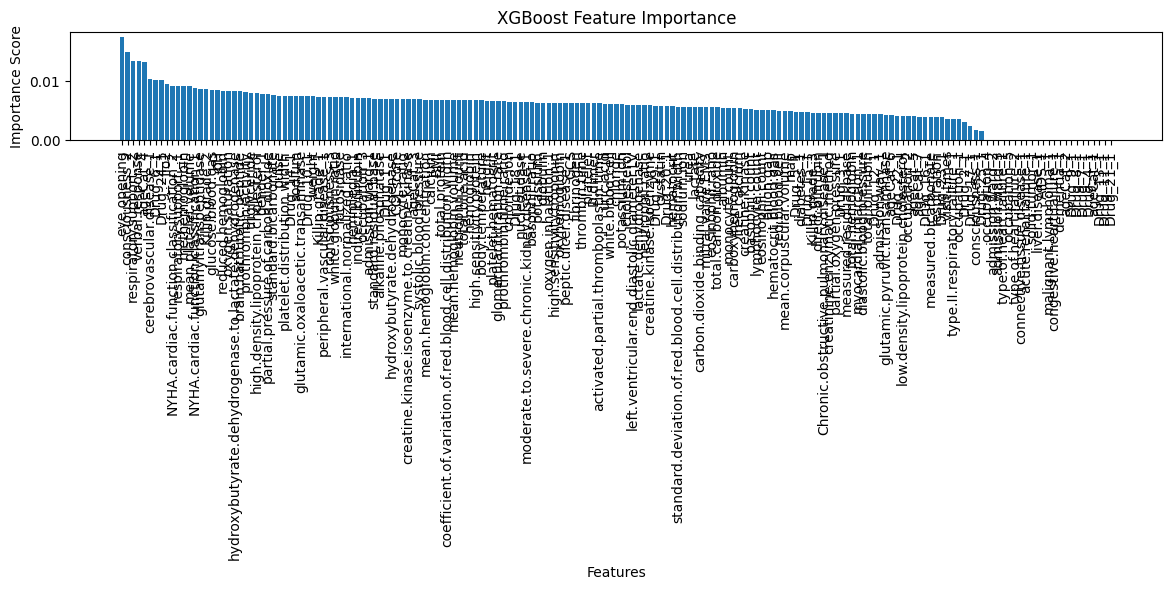


Top 10 Most Important Features:
                                    Feature  Importance
11                              eye.opening    0.017444
139                         consciousness_2    0.014960
142                  respiratory.support._2    0.013482
12                          verbal.response    0.013390
148                                ageCat_4    0.013208
125               cerebrovascular.disease_1    0.010328
157                                Drug_6_1    0.010279
175                               Drug_24_1    0.010193
13                                     fio2    0.009469
118  NYHA.cardiac.function.classification_2    0.009263
141                  respiratory.support._1    0.009180
87                            methemoglobin    0.009152
32                     mean.platelet.volume    0.009135
117  NYHA.cardiac.function.classification_1    0.008882
69                   glutamyltranspeptidase    0.008769
120                          Killip.grade_2    0.008726
93             

In [65]:
ret = feature_importance(model, data, config, k = 20)

# MIMICII

In [91]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import MIMIC2IACDataset

dataset = MIMIC2IACDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(1776, 46)


,aline_flg,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,service_num,day_icu_intime,...,creatinine_first,po2_first,pco2_first,iv_day_1,hosp_exp_flg,icu_exp_flg,icu_los_day,hospital_los_day,censor_flg,day_28_flg
0,1,72.36841,1.0,75.0,29.912791,15.0,9.0,SICU,1,Friday,...,1.6,196.0,39.0,2230.875000,1,0,7.63,13.0,0,1
1,0,64.92076,0.0,55.0,20.121312,NaN,5.0,MICU,0,Saturday,...,NaN,NaN,NaN,600.000000,0,0,1.14,1.0,1,0
2,0,36.50000,0.0,70.0,27.118272,16.0,5.0,MICU,0,Friday,...,0.8,298.0,30.0,2086.800293,0,0,2.86,5.0,1,0
3,1,44.49191,0.0,NaN,NaN,21.0,7.0,SICU,1,Saturday,...,0.5,146.0,23.0,NaN,1,1,0.58,3.0,0,1
4,1,23.74217,1.0,95.2,28.464563,18.0,7.0,SICU,1,Saturday,...,1.0,134.0,30.0,2358.244141,0,0,1.75,5.0,1,0


In [92]:
dataset.show_dataset_info()

Dataset name: mimicii_iac (2008) Subject Area: Medical
Dataset URL: https://physionet.org/content/mimic2-iaccd/1.0/
Dataset description: Clinical data from the MIMIC-II database for a case study on indwelling arterial catheters
Dataset notes: MIMIC-II
Dataset data type: mixed
Number of rows: 1776, Number of columns: 46
Numerical features: (27): [ icu_los_day, age, weight_first, bmi, sapsi_first, sofa_first, day_icu_intime_num, hour_icu_intime, mort_day_censored, map_1st, hr_1st, temp_1st, spo2_1st, abg_count, wbc_first, hgb_first, platelet_first, sodium_first, potassium_first, tco2_first ...... hour_icu_intime, mort_day_censored, map_1st, hr_1st, temp_1st, spo2_1st, abg_count, wbc_first, hgb_first, platelet_first, sodium_first, potassium_first, tco2_first, chloride_first, bun_first, creatinine_first, po2_first, pco2_first, iv_day_1, hospital_los_day ]
Ordinal features: []
Binary features: ['aline_flg', 'gender_num', 'service_num', 'hosp_exp_flg', 'icu_exp_flg', 'day_28_flg', 'censor_fl

In [93]:
print(dataset.get_task_names())

['predict_hosp_expire', 'predict_icu_expire', 'predict_icu_los', 'predict_hospital_los', 'predict_day_28', 'predict_censor']


In [108]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_censor', 
    config = {
        'numerical_encoding': 'standard',
        'categorical_encoding': 'ordinal',
        'missing_strategy': 'impute', 
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (1776, 46)
After setting target feature:  (1776, 41)
After feature engineering:  (1776, 39)
After handling missing data:  (1683, 39)
['aline_flg', 'gender_num', 'service_unit', 'service_num', 'chf_flg', 'afib_flg', 'renal_flg', 'liver_flg', 'copd_flg', 'cad_flg', 'stroke_flg', 'mal_flg', 'resp_flg']
Final ml task dataset shape:  (1683, 38)
Task name: predict_censor  Task type: classification
Target: censor_flg Num classes: 2 (classes: {1: 1227, 0: 456})
Data Shape: (1683, 38) (num 24 cat 13)
Missing ratio:  0.0%
Feature Groups:
    - demongraphic: 11 features (e.g., age,sapsi_first,aline_flg ... service_unit,gender_num,day_icu_intime_num)
    - comborbidity: 9 features (e.g., afib_flg,liver_flg,chf_flg ... mal_flg,resp_flg,stroke_flg)
    - clinical_status: 17 features (e.g., map_1st,ab

,age,weight_first,bmi,sapsi_first,sofa_first,day_icu_intime_num,hour_icu_intime,map_1st,hr_1st,temp_1st,...,chf_flg,afib_flg,renal_flg,liver_flg,copd_flg,cad_flg,stroke_flg,mal_flg,resp_flg,censor_flg
0,0.681335,0.197715,0.199133,0.413793,0.529412,0.833333,0.260870,0.457895,0.437500,0.877747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.253925,0.175747,0.166644,0.448276,0.294118,0.833333,0.130435,0.340351,0.820312,0.883242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.349157,0.220017,0.174887,0.620690,0.411765,1.000000,0.173913,0.505263,0.742188,0.935440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.101903,0.286467,0.182296,0.517241,0.411765,1.000000,0.304348,0.526316,0.601562,0.883242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.254480,0.184534,0.130185,0.379310,0.294118,0.000000,0.521739,0.521053,0.468750,0.912088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,0.635073,0.204745,0.174887,0.482759,0.470588,0.000000,0.000000,0.531579,0.250000,0.885989,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1772,0.682190,0.131810,0.174887,0.379310,0.294118,1.000000,1.000000,0.468421,0.156250,0.912088,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1773,0.089496,0.171353,0.174887,0.448276,0.294118,0.333333,1.000000,0.500000,0.679688,0.939560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
1774,0.459408,0.414763,0.174887,0.517241,0.529412,0.500000,0.043478,0.473684,0.328125,0.932692,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


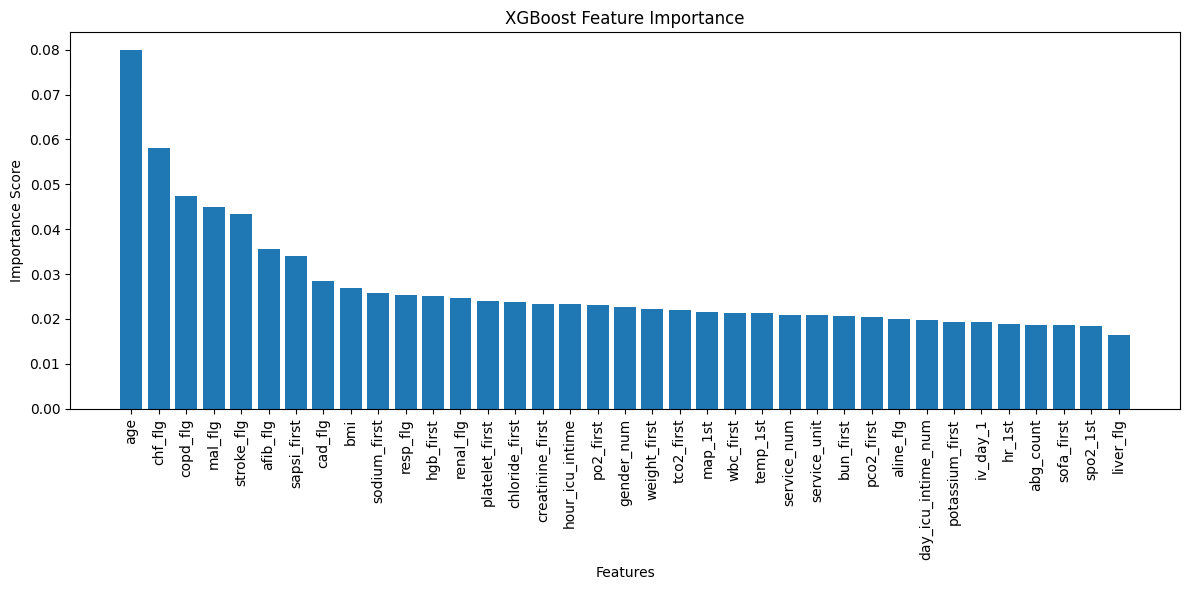


Top 10 Most Important Features:
             Feature  Importance
0                age    0.079857
28           chf_flg    0.058156
32          copd_flg    0.047333
35           mal_flg    0.044956
34        stroke_flg    0.043346
29          afib_flg    0.035517
3        sapsi_first    0.033984
33           cad_flg    0.028536
2                bmi    0.026886
15      sodium_first    0.025716
36          resp_flg    0.025362
13         hgb_first    0.025125
30         renal_flg    0.024570
14    platelet_first    0.023967
18    chloride_first    0.023666
20  creatinine_first    0.023302
6    hour_icu_intime    0.023275
21         po2_first    0.023098
25        gender_num    0.022720
1       weight_first    0.022173


In [109]:
ret = feature_importance(model, data, config)

In [99]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_hosp_expire', 
    config = {
        'numerical_encoding': 'standard',
        'categorical_encoding': 'onehot',
        'missing_strategy': 'impute', 
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (1776, 46)
After setting target feature:  (1776, 41)
After feature engineering:  (1776, 39)
After handling missing data:  (1683, 39)
['aline_flg', 'gender_num', 'service_unit', 'service_num', 'chf_flg', 'afib_flg', 'renal_flg', 'liver_flg', 'copd_flg', 'cad_flg', 'stroke_flg', 'mal_flg', 'resp_flg']
Final ml task dataset shape:  (1683, 39)
Task name: predict_hosp_expire  Task type: classification
Target: hosp_exp_flg Num classes: 2 (classes: {1: 1474, 0: 209})
Data Shape: (1683, 39) (num 24 cat 14)
Missing ratio:  0.0%
Feature Groups:
    - demongraphic: 12 features (e.g., age,sapsi_first,aline_flg_1 ... bmi,service_unit_1,day_icu_intime_num)
    - comborbidity: 9 features (e.g., mal_flg_1,afib_flg_1,chf_flg_1 ... copd_flg_1,cad_flg_1,resp_flg_1)
    - clinical_status: 17 features (e.g.,

,age,weight_first,bmi,sapsi_first,sofa_first,day_icu_intime_num,hour_icu_intime,map_1st,hr_1st,temp_1st,...,chf_flg_1,afib_flg_1,renal_flg_1,liver_flg_1,copd_flg_1,cad_flg_1,stroke_flg_1,mal_flg_1,resp_flg_1,hosp_exp_flg
0,0.681335,0.197715,0.199133,0.413793,0.529412,0.833333,0.260870,0.457895,0.437500,0.877747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.253925,0.175747,0.166644,0.448276,0.294118,0.833333,0.130435,0.340351,0.820312,0.883242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.349157,0.220017,0.174887,0.620690,0.411765,1.000000,0.173913,0.505263,0.742188,0.935440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.101903,0.286467,0.182296,0.517241,0.411765,1.000000,0.304348,0.526316,0.601562,0.883242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.254480,0.184534,0.130185,0.379310,0.294118,0.000000,0.521739,0.521053,0.468750,0.912088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,0.635073,0.204745,0.174887,0.482759,0.470588,0.000000,0.000000,0.531579,0.250000,0.885989,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1772,0.682190,0.131810,0.174887,0.379310,0.294118,1.000000,1.000000,0.468421,0.156250,0.912088,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1773,0.089496,0.171353,0.174887,0.448276,0.294118,0.333333,1.000000,0.500000,0.679688,0.939560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
1774,0.459408,0.414763,0.174887,0.517241,0.529412,0.500000,0.043478,0.473684,0.328125,0.932692,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


# Myocardial Infarction


In [116]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import MIComplicationsDataset

dataset = MIComplicationsDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1,1.0,2.0,NaN,3.0,0.0,7,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0,0.0,2.0,NaN,2.0,0.0,2,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0,0.0,2.0,NaN,2.0,0.0,3,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0,0.0,2.0,NaN,3.0,0.0,7,...,0,0,0,0,0,0,0,0,0,0


In [117]:
dataset.show_dataset_info()


Dataset name: micomplications (2024) Subject Area: Medical
Dataset URL: https://figshare.le.ac.uk/articles/dataset/Myocardial_infarction_complications_Database/12045261
Dataset description: Prediction of myocardial infarction complications from lancester medical center
Dataset notes: Clinical
Dataset data type: mixed
Number of rows: 1700, Number of columns: 123
Numerical features: (13): ['AGE', 'INF_ANAM', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'Na_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE']
Ordinal features: ['STENOK_AN', 'DLIT_AG', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n']
Binary features: (88): [ SEX,IBS_NASL,nr11,nr01,nr02,nr03,nr04,nr07,nr08,np01,np04,np05,np07,np08,np09,np10,endocr01,endocr02,endocr03,zableg01 ...... LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK

In [118]:
print(dataset.get_task_names())


['predict_lethal', 'predict_lethal_binary', 'predict_heart_failure', 'predict_num_complications']


In [121]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_lethal', 
    config = {
        'numerical_encoding': 'standard', 
        'categorical_encoding': 'ordinal',
        'missing_strategy': 'impute', 
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data


{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (1700, 123)
After setting target feature:  (1700, 112)
After feature engineering:  (1700, 112)
After handling missing data:  (1666, 109)
['SEX', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'ZSN_A', 'nr11', 'nr01', 'nr02', 'nr03', 'nr04', 'nr07', 'nr08', 'np01', 'np04', 'np05', 'np07', 'np08', 'np09', 'np10', 'endocr01', 'endocr02', 'endocr03', 'zableg01', 'zableg02', 'zableg03', 'zableg04', 'zableg06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p

,AGE,INF_ANAM,STENOK_AN,DLIT_AG,S_AD_ORIT,D_AD_ORIT,K_BLOOD,Na_BLOOD,ALT_BLOOD,AST_BLOOD,...,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
0,0.772727,0.666667,0.166667,1.000000,0.692308,0.526316,0.406780,0.403846,0.152005,0.106027,...,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,0.439394,0.333333,0.000000,0.000000,0.461538,0.473684,0.203390,0.288462,0.117845,0.066351,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,0.393939,0.000000,0.000000,0.285714,0.692308,0.526316,0.288136,0.288462,0.090909,0.033175,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,0.636364,0.000000,0.000000,0.428571,0.461538,0.368421,0.271186,0.557692,0.242424,0.156398,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,0.515152,0.000000,0.000000,1.000000,0.615385,0.473684,0.203390,0.288462,0.141414,0.085308,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.772727,0.000000,0.666667,1.000000,0.423077,0.368421,0.237288,0.250000,0.343434,0.227488,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1696,0.666667,0.000000,1.000000,1.000000,0.192308,0.000000,0.320580,0.375980,0.152005,0.106027,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1697,0.439394,1.000000,1.000000,0.000000,0.269231,0.263158,0.320580,0.375980,0.067340,0.052133,...,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,6
1698,0.803030,0.666667,0.333333,1.000000,0.423077,0.368421,0.135593,0.365385,0.141414,0.194313,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3


In [123]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_lethal_binary', 
    config = {
        'numerical_encoding': 'standard', 
        'categorical_encoding': 'onehot',
        'missing_strategy': 'impute', 
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data


{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (1700, 123)
After setting target feature:  (1700, 112)
After feature engineering:  (1700, 112)
After handling missing data:  (1666, 109)
['SEX', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'ZSN_A', 'nr11', 'nr01', 'nr02', 'nr03', 'nr04', 'nr07', 'nr08', 'np01', 'np04', 'np05', 'np07', 'np08', 'np09', 'np10', 'endocr01', 'endocr02', 'endocr03', 'zableg01', 'zableg02', 'zableg03', 'zableg04', 'zableg06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_

,AGE,INF_ANAM,STENOK_AN,DLIT_AG,S_AD_ORIT,D_AD_ORIT,K_BLOOD,Na_BLOOD,ALT_BLOOD,AST_BLOOD,...,ANT_CA_S_n_2,GEPAR_S_n_1,GEPAR_S_n_2,ASP_S_n_1,ASP_S_n_2,TIKL_S_n_1,TIKL_S_n_2,TRENT_S_n_1,TRENT_S_n_2,LET_IS_binary
0,0.772727,0.666667,0.166667,1.000000,0.692308,0.526316,0.406780,0.403846,0.152005,0.106027,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,0.439394,0.333333,0.000000,0.000000,0.461538,0.473684,0.203390,0.288462,0.117845,0.066351,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,0.393939,0.000000,0.000000,0.285714,0.692308,0.526316,0.288136,0.288462,0.090909,0.033175,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0.636364,0.000000,0.000000,0.428571,0.461538,0.368421,0.271186,0.557692,0.242424,0.156398,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0.515152,0.000000,0.000000,1.000000,0.615385,0.473684,0.203390,0.288462,0.141414,0.085308,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.772727,0.000000,0.666667,1.000000,0.423077,0.368421,0.237288,0.250000,0.343434,0.227488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1696,0.666667,0.000000,1.000000,1.000000,0.192308,0.000000,0.320580,0.375980,0.152005,0.106027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1697,0.439394,1.000000,1.000000,0.000000,0.269231,0.263158,0.320580,0.375980,0.067340,0.052133,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1698,0.803030,0.666667,0.333333,1.000000,0.423077,0.368421,0.135593,0.365385,0.141414,0.194313,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


# Diabetes Hospital


In [124]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import DiabeticHospitalDataset

dataset = DiabeticHospitalDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [125]:
dataset.show_dataset_info()

Dataset name: diabetic_hospital (2014) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008?
Dataset description: The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks
Dataset notes: Diabetic Hospital Dataset
Dataset data type: mixed
Number of rows: 101766, Number of columns: 50
Numerical features: (8): ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
Ordinal features: ['age', 'weight']
Binary features: ['gender', 'acetohexamide', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']
Multiclass features: (32): [ encounter_id,patient_nbr,race,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult

In [126]:
print(dataset.get_task_names())

['predict_readmission', 'predict_readmission_30']


In [130]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_readmission', 
    config = {
        'numerical_encoding': 'standard',
        'categorical_encoding': 'ordinal', 
        'missing_strategy': 'impute', 
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (101766, 50)
After setting target feature:  (101766, 50)
After feature engineering:  (101415, 33)
After handling missing data:  (101415, 31)
['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 'medicare', 'medicaid', 'had_emergency', 'had_inpatient_days', 'had_outpatient_days']
Final ml task dataset shape:  (101415, 31)
Task name: predict_readmission  Task type: classification
Target: readmitted_binary Num classes: 2 (classes: {0: 54627, 1: 46788})
Data Shape: (101415, 31) (num 6 cat 24)
Missing ratio:  0.0%
Feature Groups:
    - demongraphic: 10 f

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,race,gender,admission_type_id,discharge_disposition_id,...,insulin,glyburide-metformin,change,diabetesMed,medicare,medicaid,had_emergency,had_inpatient_days,had_outpatient_days,readmitted_binary
0,0.000000,0.000000,0.305344,0.000000,0.0000,0.000000,2.0,0.0,4.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.111111,0.153846,0.442748,0.000000,0.2125,0.533333,2.0,0.0,0.0,1.0,...,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,0.222222,0.076923,0.076336,0.833333,0.1500,0.333333,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
3,0.333333,0.076923,0.328244,0.166667,0.1875,0.400000,2.0,1.0,0.0,1.0,...,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0.444444,0.000000,0.381679,0.000000,0.0875,0.266667,2.0,1.0,0.0,1.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.777778,0.153846,0.381679,0.000000,0.1875,0.533333,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
101762,0.888889,0.307692,0.244275,0.500000,0.2125,0.533333,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
101763,0.777778,0.000000,0.396947,0.000000,0.1000,0.800000,2.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
101764,0.888889,0.692308,0.335878,0.333333,0.2500,0.533333,2.0,0.0,1.0,0.0,...,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


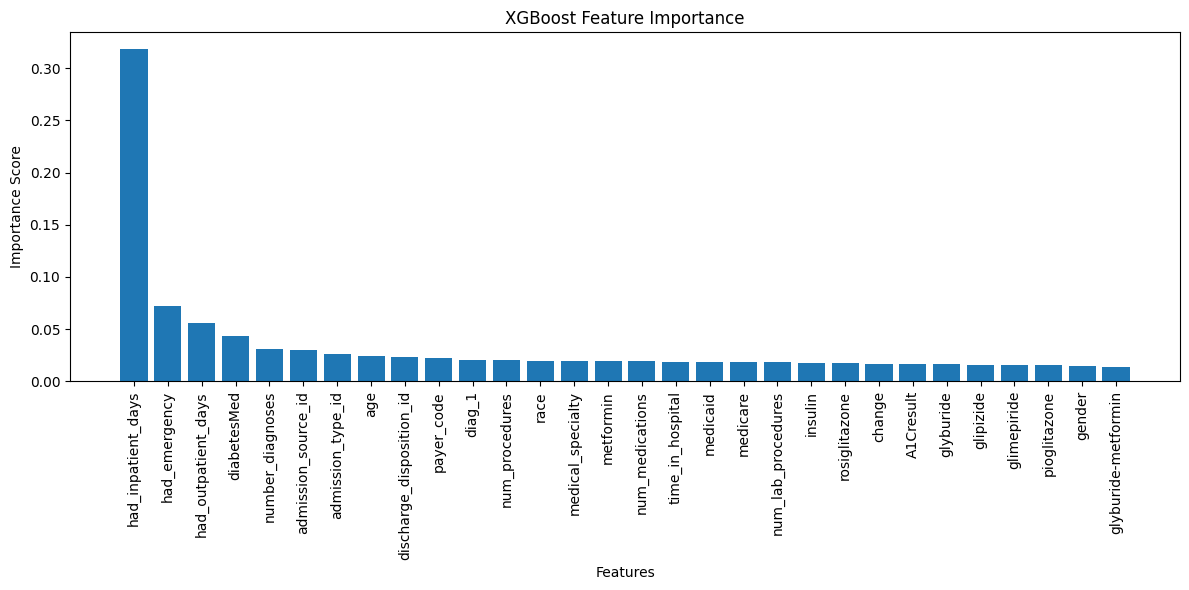


Top 10 Most Important Features:
                     Feature  Importance
28        had_inpatient_days    0.318454
27             had_emergency    0.071724
29       had_outpatient_days    0.055762
24               diabetesMed    0.043564
5           number_diagnoses    0.031464
10       admission_source_id    0.029663
8          admission_type_id    0.026154
0                        age    0.024421
9   discharge_disposition_id    0.023247
11                payer_code    0.022797
13                    diag_1    0.020639
3             num_procedures    0.020597
6                       race    0.019586
12         medical_specialty    0.019363
15                 metformin    0.019150
4            num_medications    0.019030
1           time_in_hospital    0.018674
26                  medicaid    0.018436
25                  medicare    0.018189
2         num_lab_procedures    0.018058


,Feature,Importance
28,had_inpatient_days,0.318454
27,had_emergency,0.071724
29,had_outpatient_days,0.055762
24,diabetesMed,0.043564
5,number_diagnoses,0.031464
10,admission_source_id,0.029663
8,admission_type_id,0.026154
0,age,0.024421
9,discharge_disposition_id,0.023247
11,payer_code,0.022797


In [131]:
feature_importance(model, data, config)

In [132]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_readmission', 
    config = {
        'numerical_encoding': 'standard',
        'categorical_encoding': 'onehot', 
        'missing_strategy': 'impute', 
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (101766, 50)
After setting target feature:  (101766, 50)
After feature engineering:  (101415, 33)
After handling missing data:  (101415, 31)
['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 'medicare', 'medicaid', 'had_emergency', 'had_inpatient_days', 'had_outpatient_days']
Final ml task dataset shape:  (101415, 80)
Task name: predict_readmission  Task type: classification
Target: readmitted_binary Num classes: 2 (classes: {0: 54627, 1: 46788})
Data Shape: (101415, 80) (num 6 cat 73)
Missing ratio:  0.0%
Feature Groups:
    - demongraphic: 35 fe

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,race_1,race_2,race_3,race_4,...,glyburide-metformin_2,glyburide-metformin_3,change_1,diabetesMed_1,medicare_1,medicaid_1,had_emergency_1,had_inpatient_days_1,had_outpatient_days_1,readmitted_binary
0,0.000000,0.000000,0.305344,0.000000,0.0000,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.111111,0.153846,0.442748,0.000000,0.2125,0.533333,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,0.222222,0.076923,0.076336,0.833333,0.1500,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
3,0.333333,0.076923,0.328244,0.166667,0.1875,0.400000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0.444444,0.000000,0.381679,0.000000,0.0875,0.266667,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.777778,0.153846,0.381679,0.000000,0.1875,0.533333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
101762,0.888889,0.307692,0.244275,0.500000,0.2125,0.533333,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
101763,0.777778,0.000000,0.396947,0.000000,0.1000,0.800000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
101764,0.888889,0.692308,0.335878,0.333333,0.2500,0.533333,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


# Arrhythmia

In [133]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import ArrhythmiaDataset

dataset = ArrhythmiaDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS_angle,...,V6_Amp_Q,V6_Amp_R,V6_Amp_S,V6_Amp_R2,V6_Amp_S2,V6_Amp_P,V6_Amp_T,V6_Amp_QRSA,V6_Amp_QRSTA,Class
0,75.0,0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56.0,1,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54.0,0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55.0,0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75.0,0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [134]:
dataset.show_dataset_info()

Dataset name: arrhythmia (1997) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/5/arrhythmia
Dataset description: Distinguish between the presence and absence of cardiac arrhythmia and classifyit in one of the 16 groups.
Dataset notes: Extracted from Signals
Dataset data type: None
Number of rows: 452, Number of columns: 280
Numerical features: (206): [ Age, Height, Weight, QRS duration, P-R interval, Q-T interval, T interval, P interval, QRS_angle, T_angle, P_angle, QRST_angle, J_angle, Heart rate, DI_Q, DI_R, DI_S, DI_R2, DI_S2, DI_num_deflections ...... V5_Amp_JJ, V5_Amp_Q, V5_Amp_R, V5_Amp_S, V5_Amp_R2, V5_Amp_S2, V5_Amp_P, V5_Amp_T, V5_Amp_QRSA, V5_Amp_QRSTA, V6_Amp_JJ, V6_Amp_Q, V6_Amp_R, V6_Amp_S, V6_Amp_R2, V6_Amp_S2, V6_Amp_P, V6_Amp_T, V6_Amp_QRSA, V6_Amp_QRSTA ]
Ordinal features: []
Binary features: (73): [ Sex,DI_Ragged_R,DI_Diphasic_R,DI_Ragged_P,DI_Diphasic_P,DI_Ragged_T,DI_Diphasic_T,DII_Ragged_R,DII_Diphasic_R,DII_Ragged_P,DII_Diphasic_P,DII_Ragge

In [141]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'Class', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'onehot', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

['Class']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (452, 280)
After setting target feature:  (452, 280)
After feature engineering:  (452, 280)
After handling missing data:  (420, 279)
['Sex', 'DI_Diphasic_R', 'DI_Ragged_P', 'DI_Diphasic_P', 'DI_Ragged_T', 'DI_Diphasic_T', 'DII_Ragged_R', 'DII_Diphasic_R', 'DII_Ragged_P', 'DII_Diphasic_P', 'DII_Ragged_T', 'DII_Diphasic_T', 'DIII_Ragged_R', 'DIII_Diphasic_R', 'DIII_Ragged_P', 'DIII_Diphasic_P', 'DIII_Ragged_T', 'DIII_Diphasic_T', 'AVR_Ragged_R', 'AVR_Diphasic_R', 'AVR_Ragged_P', 'AVR_Diphasic_P', 'AVR_Ragged_T', 'AVR_Diphasic_T', 'AVL_Diphasic_R', 'AVL_Diphasic_P', 'AVL_Ragged_T', 'AVL_Diphasic_T', 'AVF_Ragged_R', 'AVF_Diphasic_R', 'AVF_Ragged_T', 'AVF_Diphasic_T', 'V1_Ragged_R', 'V1_Diphasic_R', 'V1_Ragged_P', 'V1_Diphasic_P', 'V1_Ragged_T', 'V1_Diphasic_T', 'V2_Ragged_R', 'V2_D

,Age,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS_angle,T_angle,...,V4_Ragged_T_1,V4_Diphasic_T_1,V5_Diphasic_R_1,V5_Diphasic_P_1,V5_Diphasic_T_1,V6_Ragged_R_1,V6_Diphasic_R_1,V6_Ragged_P_1,V6_Diphasic_T_1,Class
0,0.903614,0.125926,0.435294,0.270677,0.368321,0.501805,0.233333,0.590244,0.457478,0.529745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.674699,0.088889,0.341176,0.195489,0.332061,0.610108,0.140741,0.190244,0.577713,0.597734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.650602,0.099259,0.523529,0.624060,0.311069,0.555957,0.274074,0.497561,0.785924,0.589235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.662651,0.103704,0.517647,0.338346,0.385496,0.534296,0.251852,0.697561,0.586510,0.524079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5,0.156627,0.094815,0.264706,0.338346,0.318702,0.321300,0.233333,0.443902,0.818182,0.679887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.638554,0.081481,0.376471,0.187970,0.379771,0.541516,0.159259,0.570732,0.395894,0.504249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
448,0.445783,0.125926,0.464706,0.338346,0.261450,0.465704,0.333333,0.356098,0.756598,0.679887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
449,0.433735,0.090370,0.364706,0.398496,0.335878,0.480144,0.307407,0.565854,0.255132,0.439093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
450,0.385542,0.074074,0.288235,0.285714,0.202290,0.555957,0.396296,0.307317,0.662757,0.575071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


# Colposcopy


In [142]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import ColposcopyDataset

dataset = ColposcopyDataset()
data = dataset.load_raw_data()
data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,dist_to_center_cervix,dist_to_center_os,class,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
0,0.344647,0.003080,0.047522,0.288216,0.178585,0.016564,0.0,0.043500,0.010149,0.000133,...,0.265933,0.346294,green,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.165329,0.000000,0.048236,0.504736,0.502783,0.007012,0.0,0.097405,0.973837,0.004055,...,1.000000,0.283059,green,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.457010,0.001681,0.242888,0.212859,0.000000,0.000000,0.0,0.000000,0.000000,0.001756,...,0.518740,0.419375,green,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.513244,0.005711,0.213781,0.251819,0.079795,0.000000,0.0,0.017594,0.007208,0.001288,...,0.347202,0.361672,green,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,0.390319,0.009454,0.272884,0.373487,0.000000,0.000000,0.0,0.000000,0.000000,0.000196,...,0.437852,0.673196,green,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [143]:
dataset.show_dataset_info()

Dataset name: colposcopy (2017) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/384/quality+assessment+of+digital+colposcopies
Dataset description: This dataset explores the subjective quality assessment of digital colposcopies.
Dataset notes: Extracted from Signals
Dataset data type: None
Number of rows: 287, Number of columns: 70
Numerical features: (62): [ cervix_area, os_area, walls_area, speculum_area, artifacts_area, cervix_artifacts_area, os_artifacts_area, walls_artifacts_area, speculum_artifacts_area, cervix_specularities_area, os_specularities_area, walls_specularities_area, speculum_specularities_area, specularities_area, area_h_max_diff, rgb_cervix_r_mean, rgb_cervix_r_std, rgb_cervix_r_mean_minus_std, rgb_cervix_r_mean_plus_std, rgb_cervix_g_mean ...... hsv_cervix_s_std, hsv_cervix_v_mean, hsv_cervix_v_std, hsv_total_h_mean, hsv_total_h_std, hsv_total_s_mean, hsv_total_s_std, hsv_total_v_mean, hsv_total_v_std, fit_cervix_hull_rate, fit_cervix_hull_to

In [145]:
print(dataset.get_task_names())

['type_prediction', 'consensus_prediction', 'expert_0_prediction', 'expert_1_prediction', 'expert_2_prediction', 'expert_3_prediction', 'expert_4_prediction', 'expert_5_prediction']


In [150]:
dataset.generate_ml_task_dataset(
    task_name = 'consensus_prediction', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'onehot', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (287, 70)
After setting target feature:  (287, 63)
After feature engineering:  (287, 63)
After handling missing data:  (287, 63)
[]
Final ml task dataset shape:  (287, 63)
Task name: consensus_prediction  Task type: classification
Target: consensus Num classes: 2 (classes: {0: 216, 1: 71})
Data Shape: (287, 63) (num 62 cat 0)
Missing ratio:  0.0%
Feature Groups:
None
(183, 62) (46, 62) (183,) (46,)
Accuracy: 0.7931
F1 Score: 0.5000
ROC AUC: 0.7906
PR AUC: 0.5855


,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_cervix_bbox_rate,fit_cervix_bbox_total,fit_circle_rate,fit_circle_total,fit_ellipse_rate,fit_ellipse_total,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,consensus
0,0.344647,0.073213,0.047522,0.440172,0.355193,0.036088,0.000000,0.056831,0.010422,0.000506,...,0.837919,0.409593,0.752980,0.318105,0.902271,0.380331,0.148556,0.191864,0.286296,0
1,0.165329,0.000000,0.048236,0.770848,1.000000,0.015278,0.000000,0.127255,1.000000,0.015398,...,0.641640,0.256589,0.620598,0.185148,0.838212,0.196391,0.216894,1.000000,0.217258,1
2,0.457010,0.039965,0.242888,0.325085,0.000000,0.000000,0.000000,0.000000,0.000000,0.006667,...,0.741658,0.613624,0.791072,0.401504,0.862255,0.527734,0.165022,0.470180,0.366085,1
3,0.513244,0.135763,0.213781,0.384586,0.158707,0.000000,0.000000,0.022986,0.007401,0.004892,...,0.848789,0.602149,0.771374,0.462422,0.903784,0.565436,0.128998,0.281333,0.303086,0
4,0.390319,0.224745,0.272884,0.570401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000744,...,0.876156,0.443628,0.778611,0.348402,0.897219,0.433158,0.106969,0.381130,0.643201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.610160,0.064812,0.298345,0.000000,0.056058,0.100641,0.000000,0.000000,0.000000,0.083138,...,0.676266,0.898476,0.698778,0.606855,0.859057,0.707208,0.245631,0.291996,0.294613,1
283,0.439891,0.142741,0.000000,0.000000,0.027868,0.069398,0.000000,0.000000,0.000000,0.026240,...,0.804561,0.544461,0.833466,0.366807,0.938255,0.466820,0.103738,0.482232,0.364324,0
284,0.696616,0.159102,0.169087,0.223453,0.034243,0.053847,0.078889,0.000000,0.000000,0.054231,...,0.823772,0.842105,0.667400,0.725417,0.956560,0.725114,0.341985,0.398036,0.552572,0
285,1.000000,0.000000,0.000000,0.000000,0.011093,0.012152,0.000000,0.000000,0.000000,0.007474,...,0.995819,1.000000,0.694993,1.000000,0.995692,1.000000,0.620110,1.000000,0.347729,1


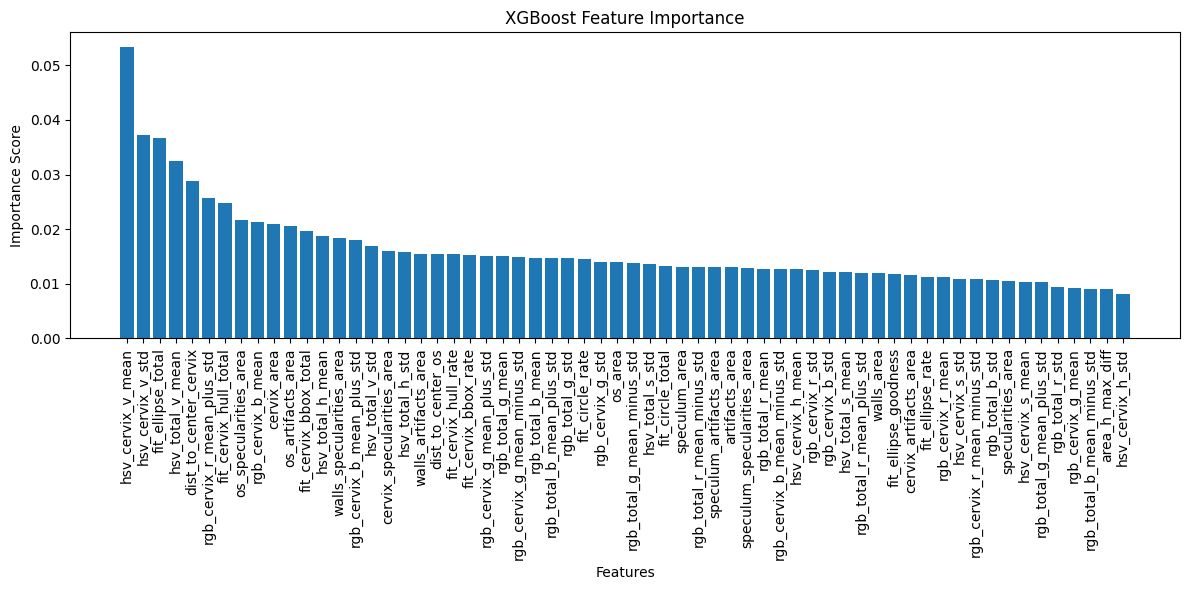


Top 10 Most Important Features:
                       Feature  Importance
43           hsv_cervix_v_mean    0.053353
44            hsv_cervix_v_std    0.037212
58           fit_ellipse_total    0.036617
49            hsv_total_v_mean    0.032430
60       dist_to_center_cervix    0.028868
18  rgb_cervix_r_mean_plus_std    0.025635
52       fit_cervix_hull_total    0.024754
10       os_specularities_area    0.021642
23           rgb_cervix_b_mean    0.021268
0                  cervix_area    0.021013
6            os_artifacts_area    0.020540
54       fit_cervix_bbox_total    0.019630
45            hsv_total_h_mean    0.018798
11    walls_specularities_area    0.018442
26  rgb_cervix_b_mean_plus_std    0.018080
50             hsv_total_v_std    0.016972
9    cervix_specularities_area    0.015935
46             hsv_total_h_std    0.015874
7         walls_artifacts_area    0.015533
61           dist_to_center_os    0.015454


,Feature,Importance
43,hsv_cervix_v_mean,0.053353
44,hsv_cervix_v_std,0.037212
58,fit_ellipse_total,0.036617
49,hsv_total_v_mean,0.032430
60,dist_to_center_cervix,0.028868
...,...,...
28,rgb_total_r_std,0.009329
19,rgb_cervix_g_mean,0.009205
37,rgb_total_b_mean_minus_std,0.009122
14,area_h_max_diff,0.009109


In [151]:
feature_importance(model, data, config)

# Z-Alizadeh sani

In [152]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import ZAlizadehsaniDataset

dataset = ZAlizadehsaniDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,LAD,LCX,RCA,Cath
0,53.0,90.0,175.0,Male,29.387755,0,1,1,0,0,...,39.0,52.0,261.0,50.0,0,N,Stenotic,Normal,Stenotic,CAD
1,67.0,70.0,157.0,Fmale,28.398718,0,1,0,0,0,...,38.0,55.0,165.0,40.0,4,N,Stenotic,Stenotic,Normal,CAD
2,54.0,54.0,164.0,Male,20.077335,0,0,1,0,0,...,38.0,60.0,230.0,40.0,2,mild,Stenotic,Normal,Normal,CAD
3,66.0,67.0,158.0,Fmale,26.838648,0,1,0,0,0,...,18.0,72.0,742.0,55.0,0,Severe,Normal,Normal,Normal,Normal
4,50.0,87.0,153.0,Fmale,37.165193,0,1,0,0,0,...,55.0,39.0,274.0,50.0,0,Severe,Normal,Normal,Normal,Normal


In [153]:
dataset.show_dataset_info()

Dataset name: zalizadehsani (2017) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/411/extention+of+z+alizadeh+sani+dataset
Dataset description: Collections for CAD diagnosis.
Dataset notes: Extracted from Signals, CAD
Dataset data type: None
Number of rows: 303, Number of columns: 59
Numerical features: (21): [ Age, Weight, Length, BMI, BP, PR, FBS, CR, TG, LDL, HDL, BUN, ESR, HB, K, Na, WBC, Lymph, Neut, PLT ...... Weight, Length, BMI, BP, PR, FBS, CR, TG, LDL, HDL, BUN, ESR, HB, K, Na, WBC, Lymph, Neut, PLT, EF-TTE ]
Ordinal features: []
Binary features: (35): [ Sex,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea ...... Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,LAD,LCX

In [155]:
print(dataset.get_task_names())

['LAD', 'LCX', 'RCA', 'Cath']


In [157]:
dataset.generate_ml_task_dataset(
    task_name = 'LAD', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'ordinal', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (303, 59)
After setting target feature:  (303, 56)
After feature engineering:  (303, 56)
After handling missing data:  (303, 56)
['Sex', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class', 'Atypical', 'Nonanginal', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'LVH', 'Poor R Progression', 'BBB', 'Region RWMA', 'VHD']
Final ml task dataset shape:  (303, 55)
Task name: LAD  Task type: classification
Target: LAD Num classes: 2 (classes: {0: 177, 1: 126})
Data Shape: (303, 55) (num 21 cat 33)
Missing ratio:  0.0%
Feature Groups:
None
(193, 54) (49, 54) (193,)

,Age,Weight,Length,BMI,BP,PR,FBS,CR,TG,LDL,...,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,BBB,Region RWMA,VHD,LAD
0,0.410714,0.583333,0.729167,0.494721,0.2,0.500000,0.082840,0.117647,0.210267,0.640187,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,0.660714,0.305556,0.354167,0.451314,0.5,0.500000,0.053254,0.294118,0.268509,0.481308,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,1.0,0
2,0.428571,0.083333,0.500000,0.086105,0.1,0.833333,0.068047,0.294118,0.065153,0.242991,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0
3,0.642857,0.263889,0.375000,0.382846,0.1,0.500000,0.047337,0.411765,0.025666,0.172897,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1
4,0.357143,0.541667,0.270833,0.836058,0.2,0.500000,0.124260,0.294118,0.131293,0.429907,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.500000,0.500000,0.583333,0.511142,0.1,0.433333,0.088757,0.294118,0.074038,0.453271,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
299,0.446429,0.222222,0.250000,0.420685,0.1,0.166667,0.071006,0.235294,0.073050,0.102804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1
300,0.321429,0.402778,0.416667,0.525020,0.4,0.333333,0.062130,0.294118,0.055281,0.439252,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1
301,0.482143,0.583333,0.395833,0.767358,0.1,0.166667,0.100592,0.294118,0.077986,0.523364,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


# SPECTF


In [158]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import SPECTFDataset

dataset = SPECTFDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(267, 45)


,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S,Diagnosis
0,59.0,52.0,70.0,67.0,73.0,66.0,72.0,61.0,58.0,52.0,...,56.0,62.0,56.0,72.0,62.0,74.0,74.0,64.0,67.0,1
1,72.0,62.0,69.0,67.0,78.0,82.0,74.0,65.0,69.0,63.0,...,71.0,63.0,60.0,69.0,73.0,67.0,71.0,56.0,58.0,1
2,71.0,62.0,70.0,64.0,67.0,64.0,79.0,65.0,70.0,69.0,...,70.0,66.0,65.0,64.0,55.0,61.0,41.0,51.0,46.0,1
3,69.0,71.0,70.0,78.0,61.0,63.0,67.0,65.0,59.0,59.0,...,61.0,66.0,65.0,72.0,73.0,68.0,68.0,59.0,63.0,1
4,70.0,66.0,61.0,66.0,61.0,58.0,69.0,69.0,72.0,68.0,...,69.0,70.0,66.0,70.0,64.0,60.0,55.0,49.0,41.0,1


In [159]:
dataset.show_dataset_info()

Dataset name: spectf (2001) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/96/spectf+heart
Dataset description: Data on cardiac Single Proton Emission Computed Tomography (SPECT) images.Each patient classified into two categories: normal and abnormal.
Dataset notes: Extracted from Signals
Dataset data type: numerical
Number of rows: 267, Number of columns: 45
Numerical features: (44): [ F1R, F1S, F2R, F2S, F3R, F3S, F4R, F4S, F5R, F5S, F6R, F6S, F7R, F7S, F8R, F8S, F9R, F9S, F10R, F10S ...... F13R, F13S, F14R, F14S, F15R, F15S, F16R, F16S, F17R, F17S, F18R, F18S, F19R, F19S, F20R, F20S, F21R, F21S, F22R, F22S ]
Ordinal features: []
Binary features: ['Diagnosis']
Multiclass features: []
Target features:
    - Diagnosis (binary) => ['1', '0']
Sensitive features: []
Drop features: []
Feature Distribution:
    - F1R        (float64) : NA:  0.0% -     39 values - [   23.00,    83.00] (   66.18,     8.25)
    - F1S        (float64) : NA:  0.0% -     43 values - [   21

In [160]:
print(dataset.get_task_names())

['Diagnosis']


In [161]:
dataset.generate_ml_task_dataset(
    task_name = 'Diagnosis', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'ordinal', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (267, 45)
After setting target feature:  (267, 45)
After feature engineering:  (267, 45)
After handling missing data:  (267, 45)
[]
Final ml task dataset shape:  (267, 45)
Task name: Diagnosis  Task type: classification
Target: Diagnosis Num classes: 2 (classes: {0: 212, 1: 55})
Data Shape: (267, 45) (num 44 cat 0)
Missing ratio:  0.0%
Feature Groups:
None
(170, 44) (43, 44) (170,) (43,)
Accuracy: 0.7778
F1 Score: 0.3333
ROC AUC: 0.7801
PR AUC: 0.3975


,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S,Diagnosis
0,0.600000,0.516667,0.727273,0.66,0.852459,0.640625,0.796875,0.650794,0.707692,0.535714,...,0.671875,0.617021,0.622951,0.847222,0.746667,0.896104,0.880000,0.746479,0.913043,0
1,0.816667,0.683333,0.704545,0.66,0.934426,0.890625,0.828125,0.714286,0.876923,0.732143,...,0.906250,0.638298,0.688525,0.805556,0.893333,0.805195,0.840000,0.633803,0.782609,0
2,0.800000,0.683333,0.727273,0.60,0.754098,0.609375,0.906250,0.714286,0.892308,0.839286,...,0.890625,0.702128,0.770492,0.736111,0.653333,0.727273,0.440000,0.563380,0.608696,0
3,0.766667,0.833333,0.727273,0.88,0.655738,0.593750,0.718750,0.714286,0.723077,0.660714,...,0.750000,0.702128,0.770492,0.847222,0.893333,0.818182,0.800000,0.676056,0.855072,0
4,0.783333,0.750000,0.522727,0.64,0.655738,0.515625,0.750000,0.777778,0.923077,0.821429,...,0.875000,0.787234,0.786885,0.819444,0.773333,0.714286,0.626667,0.535211,0.536232,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.850000,0.800000,0.840909,0.72,0.803279,0.765625,0.875000,0.904762,0.815385,0.803571,...,0.843750,0.638298,0.704918,0.833333,0.826667,0.792208,0.760000,0.605634,0.768116,1
263,0.816667,0.666667,0.590909,0.64,0.704918,0.531250,0.734375,0.730159,0.984615,0.785714,...,0.796875,0.723404,0.868852,0.805556,0.826667,0.779221,0.866667,0.633803,0.695652,1
264,0.866667,0.866667,0.772727,0.86,0.770492,0.656250,0.859375,0.841270,0.846154,0.767857,...,0.843750,0.829787,0.868852,0.944444,0.920000,0.935065,0.893333,0.788732,0.971014,1
265,0.600000,0.683333,0.772727,0.80,0.737705,0.640625,0.828125,0.888889,0.784615,0.803571,...,0.906250,0.723404,0.836066,0.916667,0.960000,0.935065,0.906667,0.830986,0.956522,1


# Nasarian CAD


In [162]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import NasarianCADDataset

dataset = NasarianCADDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
d:\min\research_projects\MedicalDataKit\data\nasariancad\nasarian-cad-dataset.zip
(150, 50)


,Age,Weight,Length,BMI,DM,HTN,FAMILYHTN,CurrentSmoker,EXSmoker,FH,...,RBC,HB,POLY,WBC,Lymph,eo,PLT,HTC,angiographyCAD,heartattack
0,59.0,75.0,177.0,23.93,2,1,2,1,2,1,...,4.12,11.9,51.0,7700.0,42.0,0,287.0,36.0,2,1
1,48.0,82.0,185.0,27.39,1,1,1,1,2,2,...,3.88,16.1,59.0,7500.0,40.0,1,244.0,41.0,2,1
2,51.0,95.0,174.0,31.02,1,1,1,1,1,1,...,5.04,12.5,60.0,6500.0,44.0,0,325.0,40.0,1,1
3,55.0,70.0,172.0,24.80,1,1,1,1,1,1,...,4.16,13.0,57.0,6000.0,45.0,1,203.0,39.0,2,1
4,51.0,104.0,167.0,37.29,2,2,1,1,1,1,...,4.40,13.3,50.0,6000.0,52.0,1,237.0,40.0,1,1


In [163]:
dataset.show_dataset_info()

Dataset name: nasariancad (2022) Subject Area: Medical
Dataset URL: https://www.kaggle.com/datasets/elhamnasarian/nasarian-cad-dataset
Dataset description: First Heart Disease Dataset with Occupational Risk Factors + Clinical Features
Dataset notes: CAD
Dataset data type: mixed
Number of rows: 150, Number of columns: 50
Numerical features: (19): ['Age', 'Weight', 'Length', 'BMI', 'BP', 'PR', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'RBC', 'HB', 'POLY', 'WBC', 'PLT', 'HTC', 'Lymph', 'FBS']
Ordinal features: []
Binary features: (29): [ heartattack,DM,HTN,FAMILYHTN,CurrentSmoker,EXSmoker,FH,Obesity,CHAGHISHEKAMI,CRF,CVA,Airwaydisease,ThyroidDisease,HLP,STRESS,noise,shiftwork,Edema,WeakPeripheralPulse,SystolicMurmur ...... CRF,CVA,Airwaydisease,ThyroidDisease,HLP,STRESS,noise,shiftwork,Edema,WeakPeripheralPulse,SystolicMurmur,DiastolicMurmur, ChestPain,Dyspnea,heartbeat,syanoz,Function,exercisetest,arytmi,angiographyCAD ]
Multiclass features: ['eo', 'Lungrales']
Target features:
    - angiographyC

In [164]:
print(dataset.get_task_names())

['predict_cad', 'predict_heartattack']


In [167]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_cad', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'ordinal', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (150, 50)
For this dataset, drop_unused_targets True is considered as False. No target features will be dropped.
After setting target feature:  (150, 50)
After feature engineering:  (150, 50)
After handling missing data:  (150, 50)
['DM', 'HTN', 'FAMILYHTN', 'CurrentSmoker', 'EXSmoker', 'FH', 'Obesity', 'CHAGHISHEKAMI', 'CRF', 'CVA', 'Airwaydisease', 'ThyroidDisease', 'HLP', 'STRESS', 'noise', 'shiftwork', 'Edema', 'WeakPeripheralPulse', 'Lungrales', 'SystolicMurmur', 'DiastolicMurmur', ' ChestPain', 'Dyspnea', 'heartbeat', 'syanoz', 'Function', 'exercisetest', 'arytmi', 'eo', 'heartattack']
Final ml task dataset shape:  (150, 50)
Task name: predict_cad  Task type: classification
Target: angiographyCAD Num classes: 2 (classes: {0: 100, 1: 50})
Data Shape: (150, 50) (num 19 cat 30)
Missi

,Age,Weight,Length,BMI,BP,PR,FBS,CR,TG,LDL,...,ChestPain,Dyspnea,heartbeat,syanoz,Function,exercisetest,arytmi,eo,heartattack,angiographyCAD
0,0.80,0.274194,0.873563,0.254585,0.363957,0.461538,0.155,0.031746,0.297578,0.320148,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0.36,0.387097,0.965517,0.405677,0.181979,0.461538,0.225,0.000000,0.477509,0.398434,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.48,0.596774,0.839080,0.564192,0.454046,0.461538,0.155,0.031746,0.231834,0.357231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.64,0.193548,0.816092,0.292576,0.181979,0.430769,0.175,0.015873,0.214533,0.534405,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,0.48,0.741935,0.758621,0.837991,0.544134,0.400000,0.170,0.047619,0.193772,0.431397,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.76,0.048387,0.735632,0.200000,0.363957,0.246154,0.195,0.063492,0.484429,0.513803,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
146,0.84,0.032258,0.781609,0.127074,0.726113,0.461538,0.155,0.047619,0.148789,0.460239,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
147,0.84,0.209677,0.758621,0.321397,0.362156,0.369231,0.245,0.047619,0.373702,0.427276,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
148,0.84,0.451613,0.827586,0.464192,0.364858,0.430769,0.210,0.047619,0.435986,0.555006,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


# Fetal CTG

In [168]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import FetalCTGDataset

dataset = FetalCTGDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
d:\min\research_projects\MedicalDataKit\data\fetalctg\fetalhr.zip
(2126, 37)


,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [169]:
dataset.show_dataset_info()

Dataset name: fetalctg (2019) Subject Area: Medical
Dataset URL: https://www.kaggle.com/datasets/akshat0007/fetalhr
Dataset description: This dataset explores the subjective quality assessment of digital colposcopies.
Dataset notes: Extracted from Signals, CTG
Dataset data type: None
Number of rows: 2126, Number of columns: 37
Numerical features: (25): [ b, e, LBE, LB, AC, FM, UC, ASTV, MSTV, ALTV, MLTV, DL, DS, DP, DR, Width, Min, Max, Nmax, Nzeros ...... FM, UC, ASTV, MSTV, ALTV, MLTV, DL, DS, DP, DR, Width, Min, Max, Nmax, Nzeros, Mode, Mean, Median, Variance, Tendency ]
Ordinal features: []
Binary features: ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP']
Multiclass features: ['CLASS', 'NSP']
Target features:
    - A (binary) => ['0.0', '1.0']
    - B (binary) => ['0.0', '1.0']
    - C (binary) => ['0.0', '1.0']
    - D (binary) => ['0.0', '1.0']
    - E (binary) => ['0.0', '1.0']
    - AD (binary) => ['0.0', '1.0']
    - DE (binary) => ['0.0', '1.0']
    - LD (binary) => 

In [170]:
dataset.get_task_names()

['predict_pattern_A',
 'predict_pattern_B',
 'predict_pattern_C',
 'predict_pattern_D',
 'predict_pattern_E',
 'predict_pattern_AD',
 'predict_pattern_DE',
 'predict_pattern_LD',
 'predict_pattern_FS',
 'predict_pattern_SUSP',
 'predict_pattern_CLASS',
 'predict_pattern_NSP']

In [178]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_pattern_CLASS', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'ordinal', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data


{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (2126, 37)
After setting target feature:  (2126, 26)
After feature engineering:  (2126, 26)
After handling missing data:  (2126, 26)
[]
Final ml task dataset shape:  (2126, 25)
Task name: predict_pattern_CLASS  Task type: classification
Target: CLASS Num classes: 10 (classes: {2: 579, 6: 384, 1: 332, 5: 252, 4: 197, 3: 107, 9: 81, 8: 72, 0: 69, 7: 53})
Data Shape: (2126, 25) (num 24 cat 0)
Missing ratio:  0.0%
Feature Groups:
None
(1360, 24) (340, 24) (1360,) (340,)
Accuracy: 0.8920
F1 Score: 0.8279
ROC AUC: 0.9820
PR AUC: 0.8898


,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
0,0.072816,0.021135,0.259259,0.259259,0.000000,0.000000,0.000000,0.813333,0.044118,0.472527,...,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0,0
1,0.001517,0.104167,0.481481,0.481481,0.153846,0.000000,0.173913,0.066667,0.279412,0.000000,...,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5,1
2,0.053701,0.148551,0.500000,0.500000,0.076923,0.000000,0.217391,0.053333,0.279412,0.000000,...,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5,1
3,0.124697,0.273249,0.518519,0.518519,0.076923,0.000000,0.260870,0.053333,0.323529,0.000000,...,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0,1
4,0.161711,0.259662,0.481481,0.481481,0.153846,0.000000,0.217391,0.053333,0.323529,0.000000,...,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.624697,0.778986,0.629630,0.629630,0.000000,0.000000,0.260870,0.893333,0.000000,0.274725,...,0.798165,0.474138,0.222222,0.0,0.732283,0.706422,0.688073,0.007435,0.5,8
2122,0.478155,0.778986,0.629630,0.629630,0.038462,0.000000,0.391304,0.880000,0.029412,0.241758,...,0.486239,0.405172,0.333333,0.0,0.724409,0.688073,0.678899,0.011152,1.0,8
2123,0.478155,0.697162,0.629630,0.629630,0.038462,0.000000,0.304348,0.893333,0.029412,0.219780,...,0.486239,0.413793,0.277778,0.0,0.732283,0.688073,0.688073,0.014870,1.0,8
2124,0.478155,0.833937,0.629630,0.629630,0.038462,0.000000,0.391304,0.880000,0.029412,0.296703,...,0.486239,0.405172,0.333333,0.0,0.724409,0.678899,0.678899,0.014870,1.0,8


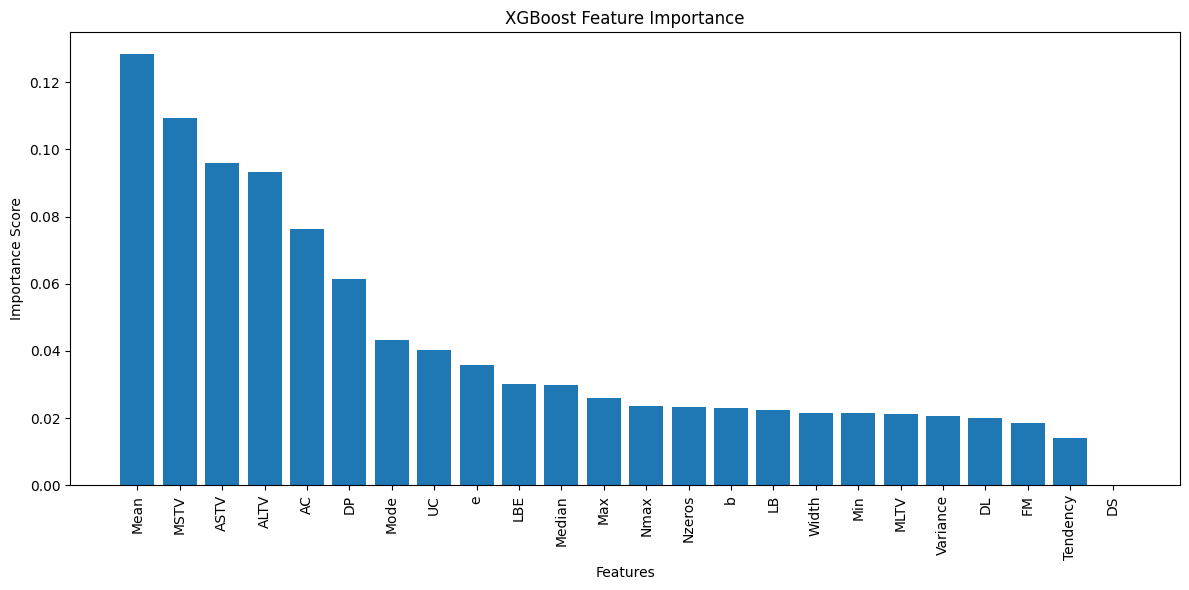


Top 10 Most Important Features:
     Feature  Importance
20      Mean    0.128442
8       MSTV    0.109322
7       ASTV    0.095911
9       ALTV    0.093239
4         AC    0.076221
13        DP    0.061415
19      Mode    0.043413
6         UC    0.040326
1          e    0.035739
2        LBE    0.030037
21    Median    0.029981
16       Max    0.025946
17      Nmax    0.023523
18    Nzeros    0.023192
0          b    0.023026
3         LB    0.022542
14     Width    0.021626
15       Min    0.021579
10      MLTV    0.021129
22  Variance    0.020655


,Feature,Importance
20,Mean,0.128442
8,MSTV,0.109322
7,ASTV,0.095911
9,ALTV,0.093239
4,AC,0.076221
13,DP,0.061415
19,Mode,0.043413
6,UC,0.040326
1,e,0.035739
2,LBE,0.030037


In [174]:
feature_importance(model, data, config)

# HCT Survival


In [190]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import CIBMTRHCTSurvivalDataset

dataset = CIBMTRHCTSurvivalDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
d:\min\research_projects\MedicalDataKit\data\cibmtr_hct_survival\equity-post-HCT-survival-predictions.zip


,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [191]:
dataset.show_dataset_info()

Dataset name: cibmtr_hct_survival (2017) Subject Area: Medical
Dataset URL: https://www.kaggle.com/competitions/equity-post-HCT-survival-predictions/data
Dataset description: The dataset consists of 59 variables related to hematopoietic stem cell transplantation (HSCT)encompassing a range of demographic and medical characteristics of both recipients and donors, such as age, sex, ethnicity, disease status, and treatment details. 
Dataset notes: HSCT, Survival Prediction
Dataset data type: None
Number of rows: 28800, Number of columns: 59
Numerical features: (12): ['hla_high_res_8', 'hla_high_res_6', 'hla_low_res_8', 'hla_low_res_6', 'hla_high_res_10', 'hla_low_res_10', 'year_hct', 'donor_age', 'age_at_hct', 'comorbidity_score', 'karnofsky_score', 'efs_time']
Ordinal features: []
Binary features: ['graft_type', 'vent_hist', 'rituximab', 'hla_match_drb1_low', 'prod_type', 'mrd_hct', 'in_vivo_tcd', 'melphalan_dose', 'efs']
Multiclass features: (38): [ dri_score,psych_disturb,cyto_score,dia

In [193]:
print(dataset.get_task_names())

['predict_survival', 'predict_efs_time']


In [195]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_survival', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'onehot', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (28800, 59)
After setting target feature:  (28800, 58)
After feature engineering:  (28800, 58)
After handling missing data:  (27472, 58)
['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'hla_match_c_high', 'tbi_status', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue', 'sex_match', 'hla_match_b_high', 'race_group', 'hepatic_mild', 'tce_div_matc

,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,year_hct,donor_age,age_at_hct,comorbidity_score,karnofsky_score,hla_low_res_8,...,cardiac_1,cardiac_2,cardiac_3,hla_match_drb1_high_1,hla_match_drb1_high_2,hla_match_drb1_high_3,pulm_moderate_1,pulm_moderate_2,pulm_moderate_3,survival_risk
0,0.812800,1.00,1.00,0.802461,0.666667,0.366845,0.134334,0.0,0.833333,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.458687
1,1.000000,1.00,1.00,1.000000,0.000000,0.812697,0.592560,0.3,0.833333,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.847759
2,1.000000,1.00,1.00,1.000000,0.916667,0.366845,0.460805,0.0,0.833333,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.462424
3,1.000000,1.00,1.00,1.000000,0.083333,0.167989,0.586317,0.0,0.833333,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.456661
4,1.000000,1.00,1.00,1.000000,0.833333,0.580925,0.403029,0.1,0.833333,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.464674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28794,1.000000,1.00,1.00,1.000000,0.666667,0.095928,0.884952,0.1,0.833333,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.682215
28796,0.333333,0.75,0.25,0.428571,0.750000,0.191047,0.244714,0.3,0.833333,0.666667,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.825494
28797,1.000000,1.00,1.00,1.000000,0.833333,0.069127,0.691634,0.5,0.833333,1.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.461142
28798,0.333333,0.25,0.25,0.285714,0.833333,0.599850,0.000000,0.1,0.833333,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.458404


# Breast Cancer Wisconsin


In [196]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import BreastCancerWisconsinDataset

dataset = BreastCancerWisconsinDataset()
data = dataset.load_raw_data()
data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F22,F23,F24,F25,F26,F27,F28,F29,F30,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [197]:
dataset.show_dataset_info()
print(dataset.get_task_names())

Dataset name: breast_wisc (1995) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
Dataset description: Diagnostic Wisconsin Breast Cancer Database.
Dataset notes: Extracted from Signals
Dataset data type: numerical
Number of rows: 569, Number of columns: 31
Numerical features: (30): [ F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11, F12, F13, F14, F15, F16, F17, F18, F19, F20 ...... F11, F12, F13, F14, F15, F16, F17, F18, F19, F20, F21, F22, F23, F24, F25, F26, F27, F28, F29, F30 ]
Ordinal features: []
Binary features: ['diagnosis']
Multiclass features: []
Target features:
    - diagnosis (binary) => ['M', 'B']
Sensitive features: []
Drop features: []
Feature Distribution:
    - F1         (float64) : NA:  0.0% -    456 values - [    6.98,    28.11] (   14.13,     3.52)
    - F2         (float64) : NA:  0.0% -    479 values - [    9.71,    39.28] (   19.29,     4.30)
    - F3         (float64) : NA:  0.0% -    522 values - [   43

In [199]:
print(dataset.get_task_names())


['diagnosis']


In [200]:
dataset.generate_ml_task_dataset(
    task_name = 'diagnosis', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'onehot', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (569, 31)
After setting target feature:  (569, 31)
After feature engineering:  (569, 31)
After handling missing data:  (569, 31)
[]
Final ml task dataset shape:  (569, 31)
Task name: diagnosis  Task type: classification
Target: diagnosis Num classes: 2 (classes: {1: 357, 0: 212})
Data Shape: (569, 31) (num 30 cat 0)
Missing ratio:  0.0%
Feature Groups:
None
(364, 30) (91, 30) (364,) (91,)
Accuracy: 0.9386
F1 Score: 0.9510
ROC AUC: 0.9927
PR AUC: 0.9958


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F22,F23,F24,F25,F26,F27,F28,F29,F30,diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,0
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,0
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,0
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,0


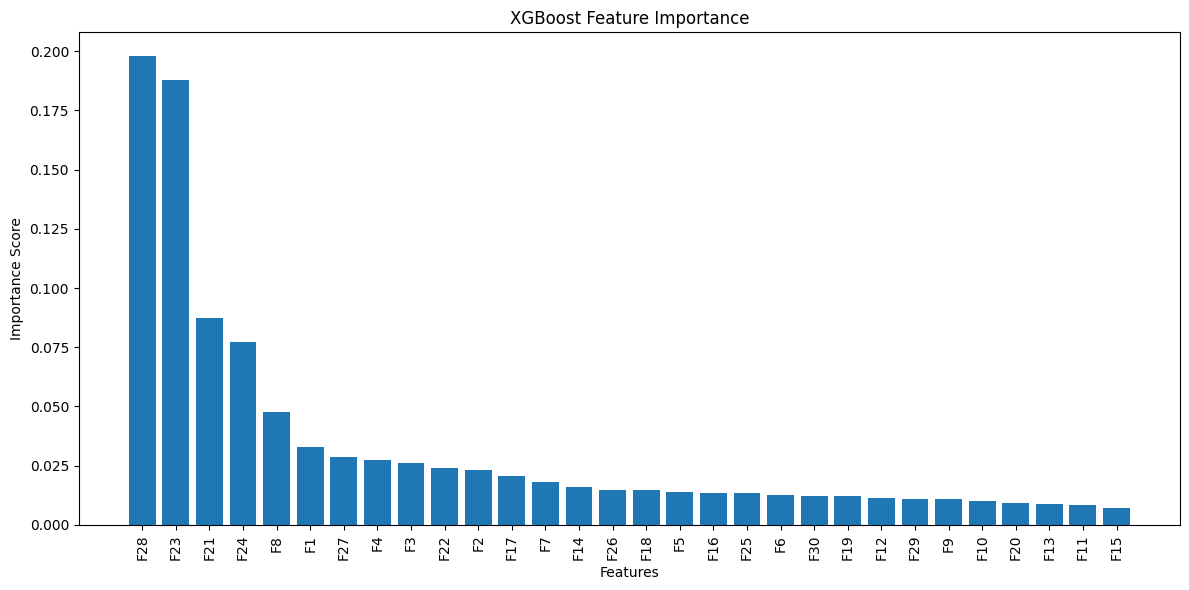


Top 10 Most Important Features:
   Feature  Importance
27     F28    0.197995
22     F23    0.187584
20     F21    0.087499
23     F24    0.077320
7       F8    0.047690
0       F1    0.032798
26     F27    0.028831
3       F4    0.027405
2       F3    0.026262
21     F22    0.023968
1       F2    0.022990
16     F17    0.020703
6       F7    0.018203
13     F14    0.016012
25     F26    0.014593
17     F18    0.014552
4       F5    0.013796
15     F16    0.013680
24     F25    0.013663
5       F6    0.012808


,Feature,Importance
27,F28,0.197995
22,F23,0.187584
20,F21,0.087499
23,F24,0.077320
7,F8,0.047690
0,F1,0.032798
26,F27,0.028831
3,F4,0.027405
2,F3,0.026262
21,F22,0.023968


In [201]:
feature_importance(model, data, config)

# Dermatology Dataset

In [202]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import DermatologyDataset

dataset = DermatologyDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,Age,Class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [203]:
dataset.show_dataset_info()

Dataset name: dermatology (1997) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/33/dermatology
Dataset description: Aim for this dataset is to determine the type of Eryhemato-Squamous Disease.
Dataset notes: 
Dataset data type: mixed
Number of rows: 366, Number of columns: 35
Numerical features: (1): ['Age']
Ordinal features: (32): [ erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges ...... PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_micro

In [205]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'Class', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'onehot', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data


['Class']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (366, 35)
After setting target feature:  (366, 35)
After feature engineering:  (366, 35)
After handling missing data:  (358, 35)
['family_history']
Final ml task dataset shape:  (358, 35)
Task name: Class  Task type: classification
Target: Class Num classes: 6 (classes: {1: 111, 2: 71, 0: 60, 3: 48, 4: 48, 5: 20})
Data Shape: (358, 35) (num 33 cat 1)
Missing ratio:  0.0%
Feature Groups:
None
(228, 34) (58, 34) (228,) (58,)
Accuracy: 0.9861
F1 Score: 0.9848
ROC AUC: 0.9990
PR AUC: 0.9948


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,Age,family_history_1,Class
0,0.666667,0.666667,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,...,0.000000,1.000000,0.000000,0.0,0.0,0.333333,0.0,0.733333,0.0,0
1,1.000000,1.000000,1.000000,0.666667,0.333333,0.000000,0.0,0.000000,0.333333,0.333333,...,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.106667,1.0,1
2,0.666667,0.333333,0.666667,1.000000,0.333333,1.000000,0.0,1.000000,0.000000,0.000000,...,0.666667,1.000000,0.666667,0.0,0.0,0.666667,1.0,0.346667,0.0,2
3,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.666667,...,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.533333,0.0,1
4,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.0,0.666667,0.000000,0.000000,...,1.000000,0.666667,1.000000,0.0,0.0,0.666667,1.0,0.600000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.666667,0.333333,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.333333,0.000000,0.0,0.0,0.666667,0.0,0.333333,0.0,4
362,1.000000,0.666667,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.333333,0.000000,0.0,0.0,0.666667,0.0,0.480000,0.0,4
363,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,0.0,0.666667,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.0,0.0,0.666667,1.0,0.373333,0.0,2
364,0.666667,0.333333,1.000000,0.333333,0.666667,1.000000,0.0,0.666667,0.000000,0.000000,...,0.666667,0.000000,0.333333,0.0,0.0,0.666667,1.0,0.666667,0.0,2


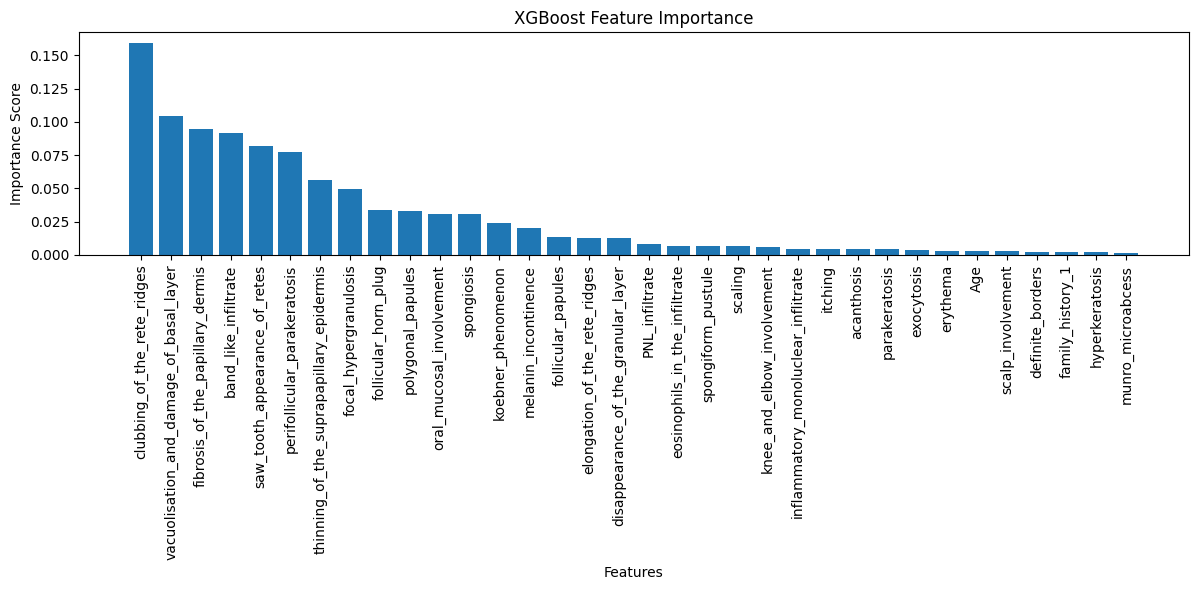


Top 10 Most Important Features:
                                     Feature  Importance
18               clubbing_of_the_rete_ridges    0.159236
25   vacuolisation_and_damage_of_basal_layer    0.104712
13          fibrosis_of_the_papillary_dermis    0.094614
31                      band_like_infiltrate    0.091252
27             saw_tooth_appearance_of_retes    0.081504
29              perifollicular_parakeratosis    0.077591
20  thinning_of_the_suprapapillary_epidermis    0.056427
23                     focal_hypergranulosis    0.049240
28                      follicular_horn_plug    0.033705
5                          polygonal_papules    0.033335
7                   oral_mucosal_involvement    0.031074
26                                spongiosis    0.030818
4                         koebner_phenomenon    0.023971
10                      melanin_incontinence    0.020392
6                         follicular_papules    0.013835
19             elongation_of_the_rete_ridges    0.01285

,Feature,Importance
18,clubbing_of_the_rete_ridges,0.159236
25,vacuolisation_and_damage_of_basal_layer,0.104712
13,fibrosis_of_the_papillary_dermis,0.094614
31,band_like_infiltrate,0.091252
27,saw_tooth_appearance_of_retes,0.081504
29,perifollicular_parakeratosis,0.077591
20,thinning_of_the_suprapapillary_epidermis,0.056427
23,focal_hypergranulosis,0.049240
28,follicular_horn_plug,0.033705
5,polygonal_papules,0.033335


In [206]:
feature_importance(model, data, config)

# Bone Transplant


In [207]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import BoneTransplantDataset

dataset = BoneTransplantDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_status,survival_time
0,1,1,22.830137,0,1,0,1,1.0,1.0,0.0,...,1.0,7.20,1.338760,5.38,35.0,19.0,51.0,32.0,0.0,999.0
1,1,0,23.342466,0,1,0,-1,-1.0,1.0,0.0,...,1.0,4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,1.0,163.0
2,1,0,26.394521,0,1,0,-1,-1.0,1.0,0.0,...,1.0,7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,1.0,435.0
3,0,0,39.684932,1,1,0,1,2.0,1.0,1.0,...,NaN,4.25,29.481647,0.14,50.0,23.0,29.0,19.0,1.0,53.0
4,0,1,33.358904,0,0,0,1,2.0,0.0,1.0,...,1.0,51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,0.0,2043.0


In [208]:
dataset.show_dataset_info()

Dataset name: bonetransplant (2020) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/565/bone+marrow+transplant+children?spm=wolai.workspace.0.0.5fd9761cERlBBA
Dataset description: The data set describes pediatric patients with several hematologic diseases, who were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation.
Dataset notes: 
Dataset data type: mixed
Number of rows: 182, Number of columns: 36
Numerical features: (10): ['Donorage', 'Recipientage', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8', 'ANCrecovery', 'PLTrecovery', 'Rbodymass', 'time_to_aGvHD_III_IV', 'survival_time']
Ordinal features: []
Binary features: ['Recipientgender', 'Stemcellsource', 'Donorage35', 'IIIV', 'Gendermatch', 'RecipientRh', 'ABOmatch', 'DonorCMV', 'RecipientCMV', 'Riskgroup', 'Txpostrelapse', 'Diseasegroup', 'HLAmismatch', 'Recipientage10', 'Recipientageint', 'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'survival_status']
Multiclass features: ['Dono

In [209]:
print(dataset.get_task_names())


['predict_survival', 'predict_survival_time']


In [210]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_survival', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'onehot', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (182, 36)
After setting target feature:  (182, 35)
After feature engineering:  (182, 35)
After handling missing data:  (178, 35)
['Recipientgender', 'Stemcellsource', 'Donorage35', 'IIIV', 'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch', 'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Riskgroup', 'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen', 'Alel', 'HLAgrI', 'Recipientage10', 'Recipientageint', 'Relapse', 'aGvHDIIIIV', 'extcGvHD']
Final ml task dataset shape:  (178, 63)
Task name: predict_survival  Task type: regression
Target: survival_risk Num classes: None
Data Shape: (178, 63) (num 9 cat 53)
Missing ratio:  0.0%
Feature Groups:
None
(113, 62) (29, 62) (113,) (29,)
RMSE: 0.0921
MAE: 0.0716


,Donorage,Recipientage,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,Recipientgender_1,...,HLAgrI_5,HLAgrI_6,Recipientage10_1,Recipientageint_1,Recipientageint_2,Relapse_1,aGvHDIIIIV_1,extcGvHD_1,extcGvHD_2,survival_risk
0,0.113355,0.459184,0.112476,0.011420,0.267267,0.315904,0.5625,0.000042,0.000022,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.564251
1,0.127236,0.173469,0.065099,0.109446,0.018519,0.159041,0.3750,0.000028,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.769231
2,0.209932,0.306122,0.125461,0.189309,0.019019,0.189542,0.8125,0.000011,1.000000,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.615287
3,0.570039,0.892857,0.060712,0.294670,0.005005,0.479303,0.8125,0.000020,0.000009,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.928571
4,0.398634,0.035714,0.895947,0.037925,0.651151,0.032680,0.2500,0.000005,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.548126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.512880,0.627551,0.180558,0.023336,0.217718,0.413943,0.3125,0.000013,0.000006,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.648352
178,0.115136,0.678571,0.067556,0.008401,0.221722,0.419390,0.1250,0.000021,1.000000,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.590912
179,0.235766,0.500000,0.121776,0.014407,0.234735,0.294118,0.3750,0.000007,1.000000,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.548126
180,0.247495,0.377551,0.256536,0.079246,0.093594,0.196078,0.1875,0.000005,0.000044,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.659341


# Parkinsons


In [211]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import ParkinsonsDataset

dataset = ParkinsonsDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [212]:
dataset.show_dataset_info()

Dataset name: parkinsons (2020) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/174/parkinsons
Dataset description: Oxford Parkinson's Disease Detection Dataset
Dataset notes: Extracted from Signal
Dataset data type: numerical
Number of rows: 195, Number of columns: 23
Numerical features: (22): [ MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, RPDE, DFA, spread1, spread2 ...... MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, RPDE, DFA, spread1, spread2, D2, PPE ]
Ordinal features: []
Binary features: ['status']
Multiclass features: []
Target features:
    - status (binary) => ['1', '0']
Sensitive features: []
Drop features: []
Feature Distribution:
    - MDVP:Fo... (float64) : NA:  0.0% -   

In [213]:
print(dataset.get_task_names())

['predict_status']


In [214]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_status', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'onehot', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (195, 23)
After setting target feature:  (195, 23)
After feature engineering:  (195, 23)
After handling missing data:  (195, 23)
[]
Final ml task dataset shape:  (195, 23)
Task name: predict_status  Task type: classification
Target: status Num classes: 2 (classes: {0: 147, 1: 48})
Data Shape: (195, 23) (num 22 cat 0)
Missing ratio:  0.0%
Feature Groups:
None
(124, 22) (32, 22) (124,) (32,)
Accuracy: 0.8462
F1 Score: 0.6667
ROC AUC: 0.9310
PR AUC: 0.8148


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310,0
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326,0
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682,0
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949,0
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.499820,0.262986,0.165722,0.092440,0.090909,0.093931,0.089496,0.094076,0.286014,0.262942,...,0.362306,0.085909,0.450134,0.447684,0.333127,0.257894,0.260408,0.549049,0.183318,1
191,0.705488,0.307974,0.138243,0.125794,0.090909,0.126686,0.107181,0.126826,0.164050,0.146261,...,0.221338,0.055543,0.435097,0.408567,0.434101,0.319956,0.276956,0.605474,0.257558,1
192,0.502730,0.281413,0.050727,0.378653,0.288538,0.267823,0.252947,0.267940,0.123608,0.140509,...,0.156631,0.338988,0.383728,0.352318,0.324299,0.212945,0.342577,0.558967,0.180580,1
193,0.642893,0.601807,0.054279,0.181703,0.130435,0.145472,0.159700,0.145288,0.122512,0.128184,...,0.155989,0.227838,0.429936,0.454176,0.277579,0.220650,0.452885,0.318222,0.163137,1


# Cervical Risk

In [215]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import CervicalRiskDataset

dataset = CervicalRiskDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [216]:
dataset.show_dataset_info()

Dataset name: cervical_risk (2023) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors?
Dataset description: This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.
Dataset notes: 
Dataset data type: mixed
Number of rows: 858, Number of columns: 36
Numerical features: (12): ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
Ordinal features: []
Binary features: (24): [ Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs

In [217]:
print(dataset.get_task_names())

['predict_biopsy']


In [218]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_biopsy', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'onehot', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (858, 36)
After setting target feature:  (858, 36)
After feature engineering:  (858, 36)
After handling missing data:  (814, 34)
['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology']
Final ml task dataset shape:  (814, 47)
Task name: predict_biopsy  Task type: classification
Target: Biopsy Num classes: 2 (classes: {0: 761, 1: 53})
Data Shape: (814, 47) (num 10 cat 36)
Missing ratio:  0.0%
Feature Groups:
None
(520, 46) (131, 46) (5

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,STDs:HPV_1,STDs:HPV_2,Dx:Cancer_1,Dx:CIN_1,Dx:HPV_1,Dx_1,Hinselmann_1,Schiller_1,Citology_1,Biopsy
0,0.070423,0.111111,0.227273,0.090909,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.028169,0.000000,0.181818,0.090909,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.549296,0.148148,0.272727,0.363636,1.0,1.0,0.100000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.464789,0.074074,0.500000,0.363636,0.0,0.0,0.500000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.408451,0.074074,0.590909,0.181818,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0.295775,0.074074,0.363636,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
854,0.267606,0.037037,0.409091,0.090909,0.0,0.0,0.266667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
855,0.169014,0.037037,0.318182,0.000000,0.0,0.0,0.002667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
856,0.281690,0.037037,0.636364,0.181818,0.0,0.0,0.002667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# HCC Survival


In [219]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import HCCSurvivalDataset

dataset = HCCSurvivalDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(165, 50)


,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody,Hepatitis C Virus Antibody,Cirrhosis,Endemic Countries,Smoking,...,Alkaline phosphatase(U/L),Total Proteins(g/dL),Creatinine(mg/dL),Number of Nodules,Major dimension of nodule(cm),Direct Bilirubin(mg/dL),Iron(mcg/dL),Oxygen Saturation(%),Ferritin(ng/mL),Class
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1
2,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0
4,1,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1


In [220]:
dataset.show_dataset_info()

Dataset name: hcc_survival (2017) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/423/hcc+survival
Dataset description: Hepatocellular Carcinoma dataset (HCC dataset) was collected at a University Hospital in Portugal.It contains real clinical data of 165 patients diagnosed with HCC.
Dataset notes: 
Dataset data type: mixed
Number of rows: 165, Number of columns: 50
Numerical features: (23): [ Age, Grams of Alcohol per day, Packs of cigarets per year, International Normalised Ratio, Alpha-Fetoprotein(ng/mL), Haemoglobin(g/dL), Mean Corpuscular Volume(fl), Leukocytes(G/L), Platelets(G/L), Albumin (mg/dL), Total Bilirubin(mg/dL), Alanine transaminase(U/L), Aspartate transaminase(U/L), Gamma glutamyl transferase(U/L), Alkaline phosphatase(U/L), Total Proteins(g/dL), Creatinine(mg/dL), Number of Nodules, Major dimension of nodule(cm), Direct Bilirubin(mg/dL) ...... International Normalised Ratio, Alpha-Fetoprotein(ng/mL), Haemoglobin(g/dL), Mean Corpuscular Volume(fl

In [221]:
print(dataset.get_task_names())

['predict_class']


In [223]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_class', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'ordinal', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (165, 50)
After setting target feature:  (165, 50)
After feature engineering:  (165, 50)
After handling missing data:  (143, 50)
['Gender', 'Symptoms', 'Alcohol', 'Hepatitis B Surface Antigen', 'Hepatitis B e Antigen', 'Hepatitis B Core Antibody', 'Hepatitis C Virus Antibody', 'Cirrhosis', 'Endemic Countries', 'Smoking', 'Diabetes', 'Obesity', 'Hemochromatosis', 'Arterial Hypertension', 'Chronic Renal Insufficiency', 'Human Immunodeficiency Virus', 'Nonalcoholic Steatohepatitis', 'Esophageal Varices', 'Splenomegaly', 'Portal Hypertension', 'Portal Vein Thrombosis', 'Liver Metastasis', 'Radiological Hallmark']
Final ml task dataset shape:  (143, 50)
Task name: predict_class  Task type: classification
Target: Class Num classes: 2 (classes: {0: 87, 1: 56})
Data Shape: (143, 50) (num 26 cat

,Age,Grams of Alcohol per day,Packs of cigarets per year,Performance Status,Encefalopathy degree,Ascites degree,International Normalised Ratio,Alpha-Fetoprotein(ng/mL),Haemoglobin(g/dL),Mean Corpuscular Volume(fl),...,Chronic Renal Insufficiency,Human Immunodeficiency Virus,Nonalcoholic Steatohepatitis,Esophageal Varices,Splenomegaly,Portal Hypertension,Portal Vein Thrombosis,Liver Metastasis,Radiological Hallmark,Class
0,0.643836,0.274000,0.029412,0.00,0.0,0.0,0.152062,0.000052,0.750000,0.740519,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,0.794521,0.100000,0.098039,0.50,0.0,0.5,0.005155,0.000003,0.336207,0.205589,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0
3,0.780822,0.080000,0.058824,0.00,0.0,0.0,0.002577,0.001347,0.724138,0.550898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4,0.767123,0.200000,0.058824,0.00,0.0,0.0,0.000000,0.000026,0.801724,0.510978,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5,0.753425,0.142017,0.040126,0.25,0.0,0.5,0.164948,0.000060,0.724138,0.439122,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.602740,0.200000,0.000000,0.75,1.0,1.0,0.149485,0.000002,0.250000,0.832335,...,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1
161,0.657534,0.000000,0.000000,0.50,0.0,0.0,0.100515,0.002699,0.612069,0.387226,...,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1
162,0.616438,0.142017,0.094118,0.00,0.0,0.0,0.048969,0.000041,0.715517,0.409182,...,1.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,0
163,0.328767,0.142017,0.040126,0.50,0.0,0.0,0.309278,0.052456,0.913793,0.954092,...,0.0,1.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,1


# Codon Usage


In [225]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.bioinfo_dataset import CodonUsageDataset

dataset = CodonUsageDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom
0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,...,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000,vrl
1,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,...,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000,vrl
2,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,...,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144,vrl
3,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,...,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000,vrl
4,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,...,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131,vrl


In [226]:
print(data.columns)
dataset.show_dataset_info()
print(dataset.get_task_names())

Index(['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC',
       'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG',
       'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU',
       'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU',
       'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA',
       'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA',
       'GAG', 'UAA', 'UAG', 'UGA', 'Kingdom'],
      dtype='object')
Dataset name: codon (2020) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/577/codon+usage
Dataset description: DNA codon usage frequencies of a large sample of diverse biological organisms from different taxa
Dataset notes: Bioinformatics
Dataset data type: numerical
Number of rows: 13028, Number of columns: 65
Numerical features: (64): [ UUU, UUC, UUA, UUG, CUU, CUC, CUA, CUG, AUU, AUC, AUA, AUG, GUU, GUC, GUA, GUG, GCU, GCC, GCA, GCG .....

In [227]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_kingdom', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'onehot', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (13028, 65)
After setting target feature:  (13028, 65)
After feature engineering:  (13028, 65)
After handling missing data:  (13026, 65)
[]
Final ml task dataset shape:  (13026, 65)
Task name: predict_kingdom  Task type: classification
Target: Kingdom Num classes: 11 (classes: {2: 2919, 0: 2831, 5: 2523, 7: 2077, 6: 1345, 8: 572, 3: 220, 9: 215, 10: 180, 1: 126, 4: 18})
Data Shape: (13026, 65) (num 64 cat 0)
Missing ratio:  0.0%
Feature Groups:
None
(8336, 64) (2084, 64) (8336,) (2084,)
Accuracy: 0.9309
F1 Score: 0.7868
ROC AUC: 0.9725
PR AUC: 0.8395


,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom
0,0.076116,0.131203,0.003304,0.034687,0.133994,0.319681,0.006101,0.373475,0.035765,0.226298,...,0.131843,0.609105,0.054023,0.405130,0.083029,0.275055,0.055531,0.019524,0.000000,0
1,0.124896,0.147999,0.004493,0.067003,0.045333,0.283906,0.012445,0.410729,0.074841,0.283296,...,0.171608,0.615437,0.065765,0.399245,0.107668,0.278146,0.059956,0.026552,0.000000,0
2,0.090842,0.237758,0.089672,0.152485,0.087102,0.110713,0.062714,0.111111,0.148189,0.181038,...,0.199737,0.425980,0.168372,0.178848,0.154738,0.155661,0.086504,0.000000,0.013496,0
3,0.081684,0.244847,0.106985,0.098033,0.174538,0.135326,0.057345,0.160473,0.155913,0.253386,...,0.142669,0.285983,0.202521,0.169712,0.209055,0.217345,0.057743,0.061304,0.000000,0
4,0.129590,0.149526,0.050684,0.363573,0.153709,0.054609,0.028856,0.193350,0.176295,0.097856,...,0.151169,0.296765,0.223419,0.218113,0.231831,0.232040,0.000000,0.017181,0.012277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,0.117441,0.387719,0.036146,0.135092,0.142125,0.208969,0.050024,0.331098,0.094703,0.442438,...,0.138318,0.187233,0.073629,0.200193,0.138381,0.258720,0.020133,0.035533,0.059794,10
13024,0.057892,0.348239,0.131104,0.062160,0.161617,0.530344,0.466325,0.117165,0.200961,0.720767,...,0.000000,0.008215,0.010449,0.114722,0.126855,0.042699,0.053540,0.037876,0.176851,10
13025,0.065486,0.362199,0.109760,0.035181,0.125529,0.502441,0.586201,0.099469,0.177074,0.749774,...,0.000000,0.000000,0.009587,0.145907,0.192422,0.018732,0.078761,0.046466,0.189035,10
13026,0.080856,0.221180,0.050684,0.127779,0.146915,0.195217,0.043619,0.369191,0.103856,0.234989,...,0.123141,0.204689,0.117311,0.220485,0.199876,0.249700,0.021903,0.030847,0.014620,10


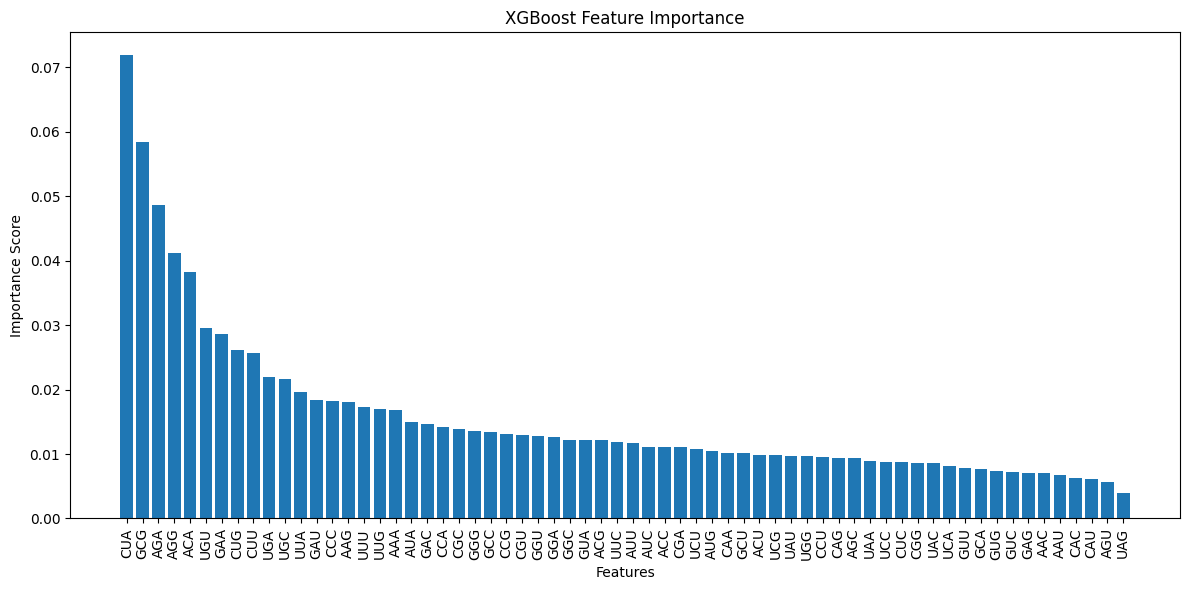


Top 10 Most Important Features:
   Feature  Importance
6      CUA    0.071819
19     GCG    0.058376
55     AGA    0.048684
56     AGG    0.041216
37     ACA    0.038251
45     UGU    0.029530
59     GAA    0.028635
7      CUG    0.026073
4      CUU    0.025594
63     UGA    0.021889
46     UGC    0.021586
2      UUA    0.019660
57     GAU    0.018432
21     CCC    0.018271
50     AAG    0.018020
0      UUU    0.017309
3      UUG    0.016953
49     AAA    0.016853
10     AUA    0.014894
58     GAC    0.014615


,Feature,Importance
6,CUA,0.071819
19,GCG,0.058376
55,AGA,0.048684
56,AGG,0.041216
37,ACA,0.038251
...,...,...
43,AAU,0.006763
48,CAC,0.006208
47,CAU,0.006115
33,AGU,0.005652


In [228]:
feature_importance(model, data, config)

# ARI Dataset 


In [229]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import ARI2Dataset

dataset = ARI2Dataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,weight,clin,wbco,lpcc,illd,biwt,hcir,wght,lgth,temp,...,puskin,abd,nut,oto,ova,oab,lp.pos,adt,Y,Y_death
0,NaN,No,NaN,NaN,60.0,2595.883301,31.0,5250.0,55.0,37.5,...,0,0,0,0,1,0,0,0,0,0
1,NaN,No,NaN,NaN,1.0,2225.552246,34.0,2350.0,48.0,37.0,...,0,0,1,0,0,0,0,0,0,0
2,NaN,No,NaN,NaN,1.0,2298.372070,34.0,2650.0,47.0,37.0,...,0,0,0,0,0,0,0,0,0,0
3,N,Yes,20000.0,NaN,1.0,2411.952881,32.5,2400.0,44.0,38.0,...,0,2,0,0,4,1,0,2,0,3
4,NaN,No,NaN,NaN,4.0,3500.000000,33.0,3000.0,52.0,37.5,...,0,0,0,0,1,0,0,0,0,0


In [230]:
dataset.show_dataset_info()

Dataset name: ari2 (2024) Subject Area: Medical
Dataset URL: https://hbiostat.org/data/
Dataset description: WHO ARI Multicentre Study of clinical signs and etiologic agents
Dataset notes: Clinical Sign, Etiologic Agent
Dataset data type: mixed
Number of rows: 4552, Number of columns: 97
Numerical features: (21): [ wbco, lpcc, illd, biwt, hcir, wght, lgth, temp, hrat, age, rr, pmcr, daydth, waz, wam, bcpc, nxray, s1, s2, s3 ...... lpcc, illd, biwt, hcir, wght, lgth, temp, hrat, age, rr, pmcr, daydth, waz, wam, bcpc, nxray, s1, s2, s3, pneu ]
Ordinal features: []
Binary features: (37): [ omph,conj,sickc,sickj,sickl,sickl1,sickl2,sickl3,slpm,slpl,wake,convul,hfb,hfe,hap,hcl,hcm,hcs,hdi,hvo ...... hcs,hdi,hvo,bat,fde,chi,hbr,twb,apn,coh,ccy,jau,csa,abb,abk,whz,hdb,puskin,oab,lp.pos ]
Multiclass features: (39): [ weight,clin,cdip,country,cprot,hlt,impcl,saogp,hfa,ldy,inc,sr1,sr2,lcw,nfl,str,gru,csd,aro,qcr ...... qcr,con,att,mvm,afe,absu,stu,deh,dcp,crs,skr,hyp,smi2,abd,nut,oto,ova,adt,Y,Y

In [ ]:
print(dataset.get_task_names())

['predict_Y', 'predict_Y_death']


In [237]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_Y', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'ordinal', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (4552, 97)
After setting target feature:  (4552, 95)
After feature engineering:  (4552, 95)
After handling missing data:  (4535, 86)
['weight', 'clin', 'cdip', 'country', 'cprot', 'hlt', 'impcl', 'omph', 'conj', 'sickc', 'sickj', 'sickl', 'sickl1', 'sickl2', 'sickl3', 'slpm', 'slpl', 'wake', 'convul', 'hfa', 'hfb', 'hfe', 'hap', 'hcl', 'hcm', 'hcs', 'hdi', 'hvo', 'bat', 'fde', 'chi', 'hbr', 'twb', 'ldy', 'inc', 'sr1', 'sr2', 'apn', 'lcw', 'nfl', 'str', 'gru', 'coh', 'ccy', 'jau', 'csd', 'csa', 'aro', 'qcr', 'con', 'att', 'mvm', 'afe', 'absu', 'stu', 'deh', 'dcp', 'crs', 'skr', 'abb', 'abk', 'hyp', 'whz', 'hdb', 'smi2', 'puskin', 'abd', 'nut', 'oto', 'ova', 'oab', 'lp.pos', 'adt']
Final ml task dataset shape:  (4535, 86)
Task name: predict_Y  Task type: classification
Target: Y Num class

,illd,biwt,hcir,wght,lgth,temp,hrat,age,rr,bcpc,...,smi2,puskin,abd,nut,oto,ova,oab,lp.pos,adt,Y
0,0.666667,0.368990,0.288136,0.562500,0.625000,0.576088,0.585253,0.688889,0.312500,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0.011111,0.283365,0.389831,0.159722,0.479167,0.521740,0.585253,0.277778,0.343750,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,0.011111,0.300202,0.389831,0.201389,0.458333,0.521740,0.585253,0.277778,0.343750,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.011111,0.326463,0.338983,0.166667,0.395833,0.630436,0.543779,0.066667,0.734375,0.009901,...,0.0,0.0,2.0,0.0,0.0,4.0,1.0,0.0,2.0,0
4,0.044444,0.578035,0.355932,0.250000,0.562500,0.576088,0.437788,0.555556,0.312500,0.000000,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4547,0.033333,0.300578,0.305085,0.180556,0.312500,0.467393,0.423963,0.377778,0.359375,0.009901,...,0.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,2.0,0
4548,0.044444,0.393064,0.362711,0.361111,0.489583,0.510870,0.474654,0.255556,0.320313,0.009901,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4549,0.022222,0.471009,0.549152,0.291667,0.479167,0.510870,0.423963,0.166667,0.359375,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4550,0.155556,0.497110,0.559322,0.611111,0.770833,0.739131,0.470046,0.877778,0.421875,0.009901,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


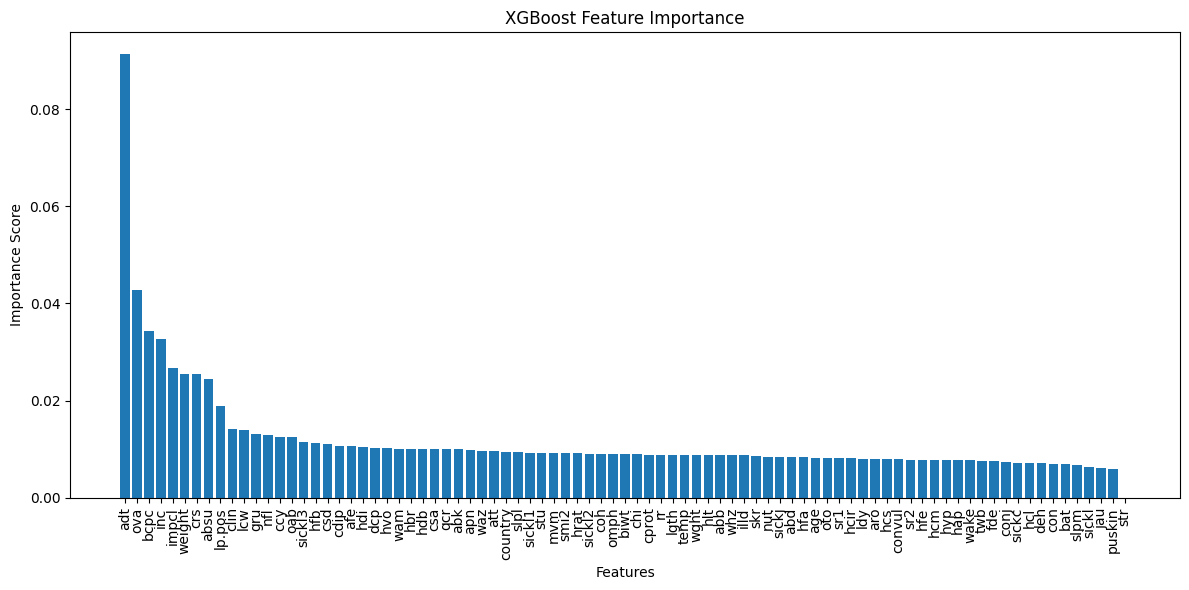


Top 10 Most Important Features:
   Feature  Importance
84     adt    0.091301
81     ova    0.042713
9     bcpc    0.034296
46     inc    0.032731
18   impcl    0.026661
12  weight    0.025392
69     crs    0.025374
65    absu    0.024539
83  lp.pos    0.018955
13    clin    0.014123
50     lcw    0.013829
53     gru    0.013020
51     nfl    0.012822
55     ccy    0.012388
82     oab    0.012387
26  sickl3    0.011363
32     hfb    0.011295
57     csd    0.010947
14    cdip    0.010729
64     afe    0.010632


,Feature,Importance
84,adt,0.091301
81,ova,0.042713
9,bcpc,0.034296
46,inc,0.032731
18,impcl,0.026661
...,...,...
27,slpm,0.006685
23,sickl,0.006321
56,jau,0.006187
77,puskin,0.005884


In [238]:
feature_importance(model, data, config)

# RHC

In [239]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import RHCDataset

dataset = RHCDataset()
data = dataset.load_raw_data()
data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,cat1,cat2,ca,sadmdte,dschdte,dthdte,lstctdte,cardiohx,chfhx,dementhx,...,seps,trauma,ortho,adld3p,urin1,race,income,ptid,death,dth30
0,COPD,NaN,Yes,11142.0,11151.0,NaN,11382.0,0,0,0,...,No,No,No,0.0,NaN,white,Under $11k,5,No,No
1,MOSF w/Sepsis,NaN,No,11799.0,11844.0,11844.0,11844.0,1,1,0,...,Yes,No,No,NaN,1437.0,white,Under $11k,7,Yes,No
2,MOSF w/Malignancy,MOSF w/Sepsis,Yes,12083.0,12143.0,NaN,12400.0,0,0,0,...,No,No,No,NaN,599.0,white,$25-$50k,9,No,No
3,ARF,NaN,No,11146.0,11183.0,11183.0,11182.0,0,0,0,...,No,No,No,NaN,NaN,white,$11-$25k,10,Yes,No
4,MOSF w/Sepsis,NaN,No,12035.0,12037.0,12037.0,12036.0,0,0,0,...,No,No,No,NaN,64.0,white,Under $11k,11,Yes,Yes


In [240]:
dataset.show_dataset_info()

Dataset name: rhc (2024) Subject Area: Medical
Dataset URL: https://hbiostat.org/data/
Dataset description: WHO ARI Multicentre Study of clinical signs and etiologic agents
Dataset notes: Clinical Sign, Etiologic Agent
Dataset data type: mixed
Number of rows: 5735, Number of columns: 62
Numerical features: (28): [ sadmdte, dschdte, dthdte, lstctdte, age, edu, surv2md1, das2d3pc, t3d30, aps1, scoma1, meanbp1, wblc1, hrt1, resp1, temp1, pafi1, alb1, hema1, bili1 ...... t3d30, aps1, scoma1, meanbp1, wblc1, hrt1, resp1, temp1, pafi1, alb1, hema1, bili1, crea1, sod1, pot1, paco21, ph1, wtkilo1, adld3p, urin1 ]
Ordinal features: []
Binary features: (27): [ death,cardiohx,chfhx,dementhx,psychhx,chrpulhx,renalhx,liverhx,gibledhx,malighx,immunhx,transhx,amihx,sex,dth30,swang1,dnr1,resp,card,neuro ...... liverhx,gibledhx,malighx,immunhx,transhx,amihx,sex,dth30,swang1,dnr1,resp,card,neuro,gastr,renal,meta,hema,seps,trauma,ortho ]
Multiclass features: ['cat1', 'cat2', 'ca', 'race', 'ninsclas', 'pt

In [241]:
print(dataset.get_task_names())

['predict_death', 'predict_dth30']


In [246]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_death', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'ordinal', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (5735, 62)
After setting target feature:  (5735, 59)
After feature engineering:  (5735, 55)
After handling missing data:  (5735, 53)
['cat1', 'cat2', 'ca', 'cardiohx', 'chfhx', 'dementhx', 'psychhx', 'chrpulhx', 'renalhx', 'liverhx', 'gibledhx', 'malighx', 'immunhx', 'transhx', 'amihx', 'sex', 'swang1', 'dnr1', 'ninsclas', 'resp', 'card', 'neuro', 'gastr', 'renal', 'meta', 'hema', 'seps', 'trauma', 'ortho', 'race', 'income']
Final ml task dataset shape:  (5735, 53)
Task name: predict_death  Task type: classification
Target: death Num classes: 2 (classes: {1: 3722, 0: 2013})
Data Shape: (5735, 53) (num 21 cat 31)
Missing ratio:  0.0%
Feature Groups:
    - demographic: 6 features (age,race,ninsclas,sex,edu,income)
    - admission_diagnosis: 13 features (e.g., seps,hema,neuro ... renal,met

,age,edu,surv2md1,das2d3pc,aps1,scoma1,meanbp1,wblc1,hrt1,resp1,...,gastr,renal,meta,hema,seps,trauma,ortho,race,income,death
0,0.622975,0.400000,0.666311,0.568182,0.298611,0.00,0.158301,0.115092,0.496,0.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0
1,0.717574,0.400000,0.784823,0.170543,0.326389,0.00,0.243243,0.150513,0.548,0.38,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,1
2,0.334702,0.468997,0.329522,0.324396,0.548611,0.00,0.220077,0.000260,0.520,0.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0
3,0.683603,0.300000,0.458398,0.542259,0.312500,0.00,0.212355,0.121338,0.232,0.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1
4,0.595041,0.331509,0.454262,0.456854,0.479167,0.41,0.250965,0.154683,0.500,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,0.686347,0.200000,0.565488,0.170543,0.291667,0.09,0.231660,0.118734,0.440,0.12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,0
5731,0.317579,0.400000,0.662162,0.545455,0.409722,0.00,0.239382,0.027079,0.520,0.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1
5732,0.745090,0.566667,0.769231,0.295455,0.277778,0.00,0.648649,0.145304,0.600,0.32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1
5733,0.588705,0.400000,0.698542,0.229936,0.333333,0.09,0.193050,0.046875,0.440,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1


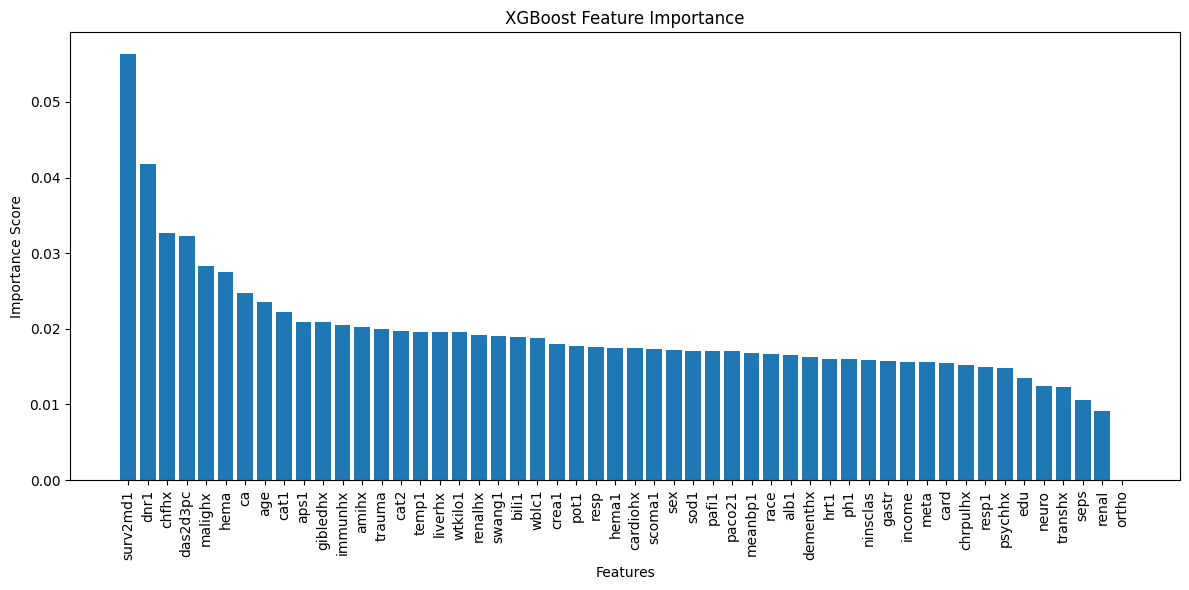


Top 10 Most Important Features:
     Feature  Importance
2   surv2md1    0.056392
38      dnr1    0.041773
25     chfhx    0.032620
3   das2d3pc    0.032247
32   malighx    0.028363
46      hema    0.027545
23        ca    0.024795
0        age    0.023566
21      cat1    0.022272
4       aps1    0.020877
31  gibledhx    0.020857
33   immunhx    0.020474
35     amihx    0.020252
48    trauma    0.020036
22      cat2    0.019652
10     temp1    0.019619
30   liverhx    0.019605
20   wtkilo1    0.019561
29   renalhx    0.019188
37    swang1    0.019038


,Feature,Importance
2,surv2md1,0.056392
38,dnr1,0.041773
25,chfhx,0.032620
3,das2d3pc,0.032247
32,malighx,0.028363
46,hema,0.027545
23,ca,0.024795
0,age,0.023566
21,cat1,0.022272
4,aps1,0.020877


In [247]:
feature_importance(model, data, config)

# Bacteremia


In [248]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import BacteremiaDataset

dataset = BacteremiaDataset()
data = dataset.load_raw_data()
data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,SEX,AGE,MCV,HGB,HCT,PLT,MCH,MCHC,RDW,MPV,...,BASOR,EOSR,LYMR,MONOR,NEU,NEUR,PDW,RBC,WBC,BloodCulture
0,2,62.0,99.3,11.5,35.9,307.0,31.5,31.8,19.5,10.8,...,0.413223,0.000000,1.652893,7.024793,22.0,90.909091,10.6,3.7,24.10,no
1,1,72.0,85.1,10.3,34.7,182.0,26.0,30.6,15.0,9.7,...,0.000000,0.826446,3.305785,1.652893,11.4,94.214876,11.4,3.9,12.17,no
2,1,46.0,96.3,7.4,22.8,64.0,31.2,32.4,19.7,11.1,...,0.568182,0.568182,8.522727,6.818182,14.7,83.522727,14.1,2.5,17.45,no
3,1,84.0,91.3,10.3,31.1,309.0,30.4,33.3,13.8,8.5,...,0.000000,0.000000,11.016949,6.779661,9.7,82.203390,8.7,3.5,11.58,no
4,2,38.0,85.1,13.7,38.7,183.0,30.2,35.3,12.6,10.0,...,0.000000,0.000000,8.333333,4.166667,8.4,87.500000,12.2,4.4,9.86,no


In [249]:
dataset.show_dataset_info()

Dataset name: bacteremia (2020) Subject Area: Medical
Dataset URL: https://hbiostat.org/data/
Dataset description: Bacteremia dataset
Dataset notes: Bacteremia
Dataset data type: numerical
Number of rows: 14691, Number of columns: 52
Numerical features: (50): [ AGE, MCV, HGB, HCT, PLT, MCH, MCHC, RDW, MPV, LYM, MONO, EOS, BASO, NT, APTT, FIB, SODIUM, POTASS, CA, PHOS ...... CHE, AP, ASAT, ALAT, GGT, LDH, CK, GLU, TRIG, CHOL, CRP, BASOR, EOSR, LYMR, MONOR, NEU, NEUR, PDW, RBC, WBC ]
Ordinal features: []
Binary features: ['SEX', 'BloodCulture']
Multiclass features: []
Target features:
    - BloodCulture (binary) => ['no', 'yes']
Sensitive features: ['SEX', 'AGE']
Drop features: []
Feature Distribution:
    - AGE        (float64) : NA:  0.0% -     85 values - [   16.00,   101.00] (   56.17,    18.15)
    - MCV        (float64) : NA:  0.3% -    506 values - [   51.00,   128.70] (   88.35,     6.46)
    - HGB        (float64) : NA:  0.3% -    157 values - [    3.00,    21.00] (   11.57,    

In [250]:
print(dataset.get_task_names())



['predict_BloodCulture']


In [251]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_BloodCulture', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'onehot', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (14691, 52)
After setting target feature:  (14691, 52)
After feature engineering:  (14691, 52)
After handling missing data:  (13144, 51)
['SEX']
Final ml task dataset shape:  (13144, 51)
Task name: predict_BloodCulture  Task type: classification
Target: BloodCulture Num classes: 2 (classes: {0: 12137, 1: 1007})
Data Shape: (13144, 51) (num 49 cat 1)
Missing ratio:  0.0%
Feature Groups:
None
(8412, 50) (2103, 50) (8412,) (2103,)
Accuracy: 0.9254
F1 Score: 0.0926
ROC AUC: 0.7840
PR AUC: 0.2996


,AGE,MCV,HGB,HCT,PLT,MCH,MCHC,RDW,MPV,LYM,...,EOSR,LYMR,MONOR,NEU,NEUR,PDW,RBC,WBC,SEX_1,BloodCulture
0,0.541176,0.593923,0.515152,0.506770,0.145115,0.603636,0.496454,0.465969,0.454545,0.002668,...,0.000000,0.016529,0.070248,0.262530,0.909091,0.213904,0.435484,0.154844,1.0,0
1,0.658824,0.397790,0.442424,0.483559,0.085249,0.403636,0.411348,0.230366,0.311688,0.002668,...,0.016529,0.033058,0.016529,0.136038,0.942149,0.256684,0.467742,0.077842,0.0,0
2,0.352941,0.552486,0.266667,0.253385,0.028736,0.592727,0.539007,0.476440,0.493506,0.010007,...,0.011364,0.085227,0.068182,0.175418,0.835227,0.401070,0.241935,0.111922,0.0,0
3,0.800000,0.483425,0.442424,0.413926,0.146073,0.563636,0.602837,0.167539,0.155844,0.008672,...,0.000000,0.110169,0.067797,0.115752,0.822034,0.112299,0.403226,0.074033,0.0,0
4,0.258824,0.397790,0.648485,0.560928,0.085728,0.556364,0.744681,0.104712,0.350649,0.005337,...,0.000000,0.083333,0.041667,0.100239,0.875000,0.299465,0.548387,0.062932,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14685,0.247059,0.354972,0.363636,0.313346,0.067529,0.498182,0.695035,0.303665,0.337662,0.000000,...,0.000000,0.000000,0.014778,0.238663,0.985222,0.267380,0.387097,0.130575,0.0,0
14686,0.329412,0.567680,0.296970,0.247582,0.116858,0.680000,0.680851,0.141361,0.324675,0.008672,...,0.041667,0.270833,0.083333,0.035800,0.625000,0.235294,0.225806,0.030853,1.0,0
14688,0.741176,0.414365,0.406061,0.419729,0.163314,0.432727,0.425532,0.198953,0.207792,0.004670,...,0.017544,0.061404,0.114035,0.110979,0.815789,0.144385,0.451613,0.072807,0.0,0
14689,0.764706,0.446133,0.515152,0.442940,0.123563,0.585455,0.723404,0.303665,0.558442,0.008672,...,0.042553,0.138298,0.106383,0.082339,0.734043,0.401070,0.435484,0.059317,0.0,0


# Crash Dataset

In [252]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import CrashDataset

dataset = CrashDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(20207, 44)


,source,trandomised,outcomeid,sex,age,injurytime,injurytype,sbp,rr,cc,...,ncell,nplasma,nplatelets,ncryo,bvii,boxid,packnum,condition,death,cause
0,3,12945.0,2,1,50.0,1.0,1,75.0,28.0,5.0,...,1.0,0.0,0.0,0.0,0.0,2001.0,25.0,-1,True,2
1,3,12932.0,190,2,27.0,1.0,1,100.0,20.0,2.0,...,NaN,NaN,NaN,NaN,0.0,2001.0,28.0,2,False,-1
2,3,12928.0,4,1,30.0,1.0,1,70.0,26.0,6.0,...,2.0,0.0,0.0,0.0,0.0,2011.0,21.0,1,False,-1
3,3,12929.0,5,1,40.0,2.0,2,60.0,20.0,5.0,...,4.0,0.0,0.0,0.0,0.0,2011.0,22.0,-1,True,6
4,3,12932.0,1154,2,23.0,4.0,2,80.0,22.0,3.0,...,NaN,NaN,NaN,NaN,0.0,2011.0,23.0,1,False,-1


In [253]:
dataset.show_dataset_info()

Dataset name: crash (2020) Subject Area: Medical
Dataset URL: https://hbiostat.org/data/
Dataset description: This publicly available clinical trial dataset of 20,207 patients was generously supplied bythe freeBIRD Bank of Injury and Emergency Research Data from the UK. The CRASH-2 trandomized trialstudied antifibrinolytic treatment in significant hemorrhage post trauma.
Dataset notes: Crash
Dataset data type: mixed
Number of rows: 20207, Number of columns: 44
Numerical features: (35): [ trandomised, age, injurytime, sbp, rr, cc, hr, gcseye, gcsmotor, gcsverbal, gcs, ddeath, ddischarge, ndaysicu, bheadinj, bneuro, bchest, babdomen, bpelvis, bpe ...... bneuro, bchest, babdomen, bpelvis, bpe, bdvt, bstroke, bbleed, bmi, bgi, bloading, bmaint, btransf, ncell, nplasma, nplatelets, ncryo, bvii, boxid, packnum ]
Ordinal features: []
Binary features: ['sex', 'death']
Multiclass features: ['source', 'injurytype', 'cause', 'condition', 'outcomeid', 'scauseother', 'status']
Target features:
    

In [254]:
print(dataset.get_task_names())

['predict_death', 'predict_condition', 'predict_cause']


In [271]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_condition', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'ordinal', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (20207, 44)
After setting target feature:  (20207, 42)
After feature engineering:  (20207, 36)
After handling missing data:  (18095, 36)
['source', 'sex', 'injurytype', 'cause']
Final ml task dataset shape:  (18095, 36)
Task name: predict_condition  Task type: classification
Target: condition Num classes: 6 (classes: {1: 5541, 4: 3785, 0: 2673, 2: 2483, 5: 2377, 3: 1236})
Data Shape: (18095, 36) (num 31 cat 4)
Missing ratio:  0.0%
Feature Groups:
    - demongraphic: 8 features (e.g., age,injurytype,cause ... ndaysicu,injurytime,trandomised)
    - clinical_status: 27 features (e.g., nplasma,nplatelets,gcsmotor ... bpelvis,ncell,bchest)
(11580, 35) (2896, 35) (11580,) (2896,)
Accuracy: 0.5488
F1 Score: 0.5085
ROC AUC: 0.8271
PR AUC: 0.5294


,trandomised,age,injurytime,sbp,rr,cc,hr,gcseye,gcsmotor,gcsverbal,...,ncell,nplasma,nplatelets,ncryo,bvii,source,sex,injurytype,cause,condition
0,0.013450,0.423529,0.012517,0.288618,0.284211,0.137931,0.539171,0.25,0.166667,0.2,...,0.016667,0.000000,0.000000,0.000000,0.0,2.0,0.0,0.0,2.0,0
1,0.005848,0.152941,0.012517,0.390244,0.200000,0.034483,0.354839,1.00,1.000000,1.0,...,0.065309,0.023992,0.006351,0.004225,0.0,2.0,1.0,0.0,0.0,1
2,0.003509,0.188235,0.012517,0.268293,0.263158,0.172414,0.585253,1.00,1.000000,0.8,...,0.033333,0.000000,0.000000,0.000000,0.0,2.0,0.0,0.0,0.0,2
3,0.004094,0.305882,0.026426,0.227642,0.200000,0.137931,0.539171,0.50,0.833333,0.6,...,0.066667,0.000000,0.000000,0.000000,0.0,2.0,0.0,1.0,6.0,0
4,0.005848,0.105882,0.054242,0.308943,0.221053,0.068966,0.447005,0.75,1.000000,1.0,...,0.065309,0.023992,0.006351,0.004225,0.0,2.0,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201,0.530409,0.258824,0.109875,0.272358,0.242105,0.068966,0.493088,1.00,1.000000,1.0,...,0.050000,0.000000,0.000000,0.000000,0.0,2.0,0.0,1.0,0.0,4
20203,0.967836,0.247059,0.026426,0.308943,0.284211,0.103448,0.474654,1.00,1.000000,1.0,...,0.065309,0.023992,0.006351,0.004225,0.0,3.0,0.0,0.0,0.0,4
20204,0.646784,0.117647,0.012517,0.471545,0.242105,0.068966,0.400922,1.00,1.000000,1.0,...,0.065309,0.023992,0.006351,0.004225,0.0,2.0,0.0,1.0,0.0,4
20205,0.414620,0.352941,0.012517,0.349593,0.200000,0.068966,0.262673,0.25,0.166667,0.2,...,0.016667,0.000000,0.000000,0.000000,0.0,2.0,0.0,0.0,1.0,0


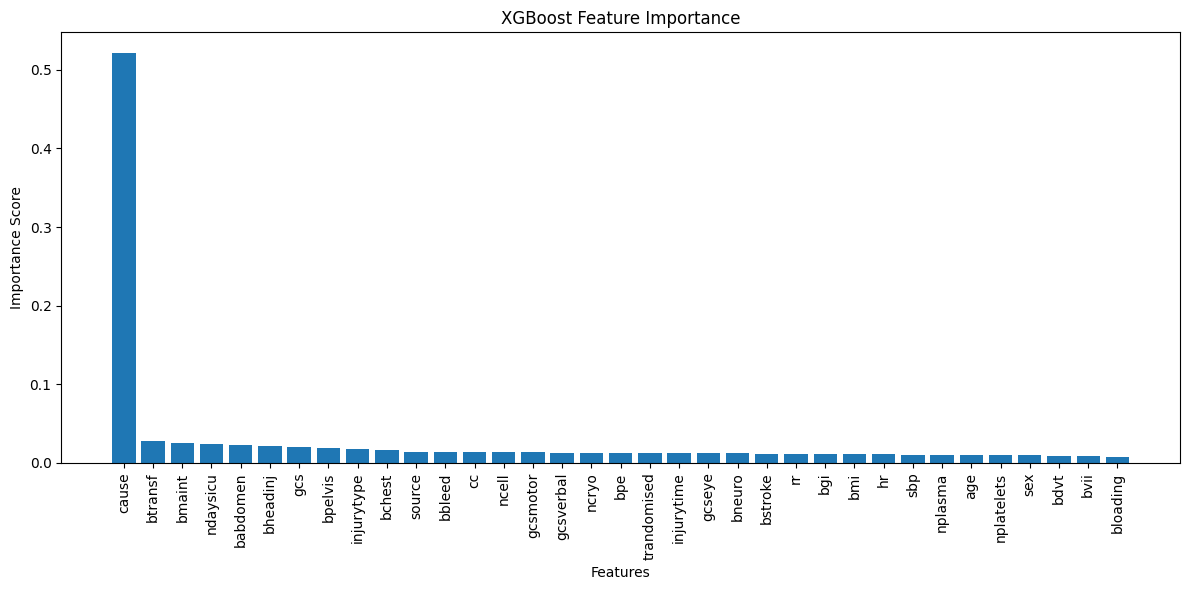


Top 10 Most Important Features:
        Feature  Importance
34        cause    0.521602
25      btransf    0.027315
24       bmaint    0.025210
11     ndaysicu    0.023707
15     babdomen    0.022458
12     bheadinj    0.020842
10          gcs    0.020066
16      bpelvis    0.019027
33   injurytype    0.017306
14       bchest    0.015985
31       source    0.013700
20       bbleed    0.013693
5            cc    0.013201
26        ncell    0.013177
8      gcsmotor    0.013166
9     gcsverbal    0.013152
29        ncryo    0.012893
17          bpe    0.012751
0   trandomised    0.012584
2    injurytime    0.012444


,Feature,Importance
34,cause,0.521602
25,btransf,0.027315
24,bmaint,0.025210
11,ndaysicu,0.023707
15,babdomen,0.022458
12,bheadinj,0.020842
10,gcs,0.020066
16,bpelvis,0.019027
33,injurytype,0.017306
14,bchest,0.015985


In [272]:
feature_importance(model, data, config)

# Support Dataset


In [284]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import SupportDataset

dataset = SupportDataset()
data = dataset.load_raw_data()
data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,age,sex,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,...,glucose,bun,urine,adlp,adls,sfdm2,adlsc,hospdead,hday,death
0,62.84998,male,5.0,2029.0,Lung Cancer,Cancer,0.0,11.0,$11-$25k,0.0,...,NaN,NaN,NaN,7.0,7.0,NaN,7.0,0,1.0,0
1,60.33899,female,4.0,4.0,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.0,$11-$25k,44.0,...,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0,1,3.0,1
2,52.74698,female,17.0,47.0,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.0,under $11k,0.0,...,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0,0,4.0,1
3,42.38498,female,3.0,133.0,Lung Cancer,Cancer,2.0,11.0,under $11k,0.0,...,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0,0,1.0,1
4,79.88495,female,16.0,2029.0,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0,0,3.0,0


In [286]:
dataset.show_dataset_info()

Dataset name: support (2020) Subject Area: Medical
Dataset URL: https://hbiostat.org/data/
Dataset description: Support dataset
Dataset notes: Support
Dataset data type: numerical
Number of rows: 9105, Number of columns: 47
Numerical features: (35): [ age, slos, d.time, num.co, edu, scoma, charges, totcst, totmcst, avtisst, sps, aps, surv2m, surv6m, hday, prg2m, prg6m, dnrday, meanbp, wblc ...... prg2m, prg6m, dnrday, meanbp, wblc, hrt, resp, temp, pafi, alb, bili, crea, sod, ph, glucose, bun, urine, adlp, adls, adlsc ]
Ordinal features: []
Binary features: ['sex', 'hospdead', 'diabetes', 'dementia']
Multiclass features: ['dzgroup', 'dzclass', 'race', 'ca', 'dnr', 'sfdm2', 'income', 'death']
Target features:
    - hospdead (binary) => ['0', '1']
    - hday (numerical) => 85 values
    - death (multiclass) => ['0', '1']
Sensitive features: ['age', 'sex', 'race']
Drop features: []
Feature Distribution:
    - age        (float64) : NA:  0.0% -   7323 values - [   18.04,   101.85] (   62.6

In [287]:
print(dataset.get_task_names())

['predict_hospdead', 'predict_hday', 'predict_death']


In [291]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_hospdead', 
    config = {
        'missing_strategy': 'impute', 
        'categorical_encoding': 'onehot', 
        'numerical_encoding': 'standard',
        'ordinal_as_numerical': True
    }, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
data = dataset.ml_task_dataset.data
config = dataset.ml_task_dataset.data_config
model = train_and_evaluate_model(data, config, model_type = 'xgb')
dataset.ml_task_dataset.data

{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'onehot', 'numerical_encoding': 'standard', 'drop_unused_targets': True}
Raw data shape:  (9105, 47)
After setting target feature:  (9105, 35)
After feature engineering:  (9105, 35)
After handling missing data:  (8624, 34)
['sex', 'dzgroup', 'dzclass', 'income', 'race', 'diabetes', 'dementia', 'ca']
Final ml task dataset shape:  (8624, 50)
Task name: predict_hospdead  Task type: classification
Target: hospdead Num classes: 2 (classes: {0: 6362, 1: 2262})
Data Shape: (8624, 50) (num 25 cat 24)
Missing ratio:  0.0%
Feature Groups:
    - demographic: 16 features (e.g., age,sex_1,income_4 ... race_1,race_5,totcst)
    - comorbidity: 16 features (e.g., dzclass_1,dzgroup_1,diabetes_1 ... ca_2,ca_1,dzgroup_6)
    - clinical_status: 17 features (e.g., wblc,alb,adls ... adlsc,hrt,bili)
(5519, 49) (1380, 49) (5519,) (1380,)
Accuracy: 0.8707
F1 Score: 0.7304
ROC AUC: 0.9137
PR AUC: 0.83

,age,slos,num.co,edu,scoma,charges,totcst,totmcst,avtisst,meanbp,...,race_1,race_2,race_3,race_4,race_5,diabetes_1,dementia_1,ca_1,ca_2,hospdead
0,0.541113,0.005882,0.000000,0.354839,0.00,0.005929,0.048682,0.040704,0.073171,0.497436,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,0.510790,0.002941,0.222222,0.387097,0.44,0.023207,0.048682,0.040704,0.341463,0.220513,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,0.419107,0.041176,0.222222,0.387097,0.00,0.027808,0.048682,0.040704,0.146341,0.358974,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,0.293973,0.000000,0.222222,0.354839,0.00,0.001299,0.048682,0.040704,0.073171,0.384615,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.746832,0.038235,0.111111,0.378958,0.26,0.034106,0.048682,0.040704,0.215447,0.302564,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9099,0.610745,0.002941,0.222222,0.387097,0.00,0.001078,0.002917,0.002926,0.024390,0.364103,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
9100,0.580036,0.058824,0.111111,0.258065,0.00,0.036018,0.054215,0.045225,0.235772,0.558974,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
9102,0.632072,0.014706,0.111111,0.378958,0.00,0.031622,0.049603,0.043943,0.268293,0.569231,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
9103,0.349946,0.011765,0.111111,0.419355,0.00,0.039901,0.048682,0.040704,0.420732,0.507692,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1


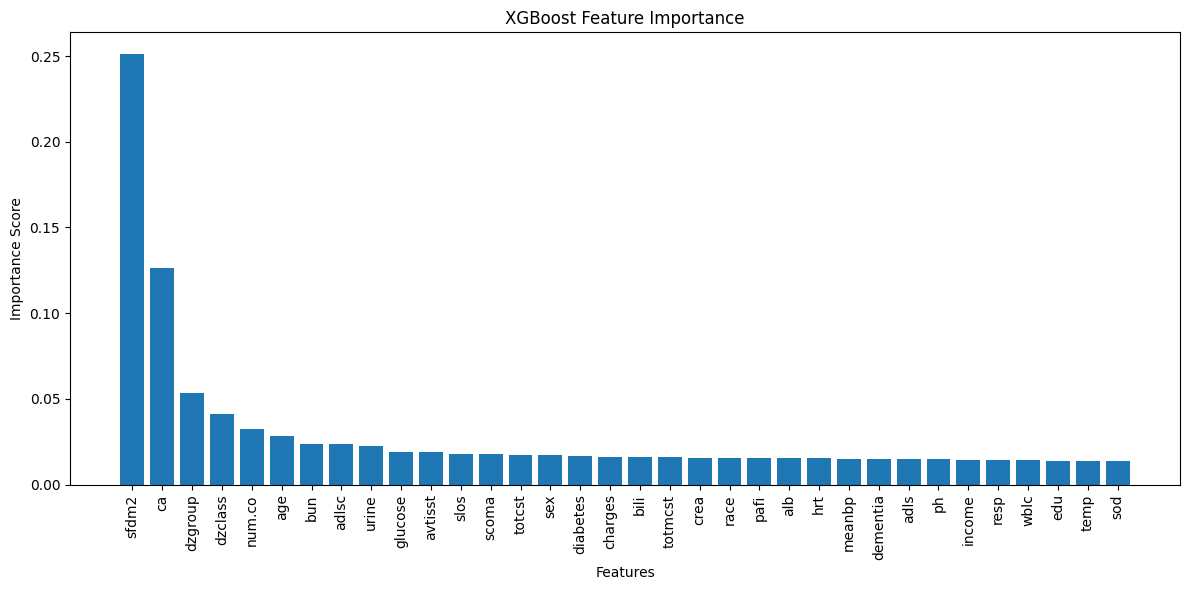


Top 10 Most Important Features:
     Feature  Importance
33     sfdm2    0.251286
32        ca    0.126187
26   dzgroup    0.053200
27   dzclass    0.040991
2     num.co    0.032520
0        age    0.028364
21       bun    0.023869
24     adlsc    0.023806
22     urine    0.022526
20   glucose    0.019086
8    avtisst    0.018758
1       slos    0.018133
4      scoma    0.018127
6     totcst    0.017401
25       sex    0.017317
30  diabetes    0.016904
5    charges    0.016378
16      bili    0.016328
7    totmcst    0.016291
17      crea    0.015679


,Feature,Importance
33,sfdm2,0.251286
32,ca,0.126187
26,dzgroup,0.053200
27,dzclass,0.040991
2,num.co,0.032520
0,age,0.028364
21,bun,0.023869
24,adlsc,0.023806
22,urine,0.022526
20,glucose,0.019086


In [289]:
feature_importance(model, data, config)

# Kidney Disease

In [ ]:
%load_ext autoreload
%autoreload 2
from src.dataset.medical_dataset import KidneyDiseaseDataset

dataset = KidneyDiseaseDataset()
dataset.load()
dataset.raw_data.head()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'src'

: 

# Parkinsons Telemonitoring


In [8]:
%load_ext autoreload
%autoreload 2

from MedDataKit.dataset.medical_dataset import ParkinsonsTelemonitoringDataset

dataset = ParkinsonsTelemonitoringDataset()
raw_data = dataset.load_raw_data()
raw_data.reset_index(drop = True, inplace = True)
raw_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [9]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import ParkinsonsTelemonitoringDataset

dataset = ParkinsonsTelemonitoringDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 5875
Number of columns: 21
Sensitive features: ['age', 'sex']
Numerical features: ['age', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
Ordinal features: []
Binary features: ['sex']
Multiclass features: []
Target features:
    - total_UPDRS (numerical)
    - motor_UPDRS (numerical)
Feature codes (ordinal, binary, multiclass):
    - sex (binary): {0: 0, 1: 1}
===========================Missing Data Statistics============================
Number of missing values: 0
Missing value statistics:

Missing pattern statistics:
    Total missing patterns: 1
    Top 10 missing patterns:
    Pattern '000000000000000000000': 100.00 %
==

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS,motor_UPDRS
0,72.0,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,...,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398,28.199
1,72.0,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,...,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894,28.447
2,72.0,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,...,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389,28.695
3,72.0,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,...,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810,28.905
4,72.0,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,...,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375,29.187


In [10]:
dataset.data_config()

{'target_var': 'total_UPDRS',
 'sensitive_var': ['age', 'sex'],
 'task_type': 'regression',
 'numerical_features': ['age',
  'test_time',
  'motor_UPDRS',
  'Jitter(%)',
  'Jitter(Abs)',
  'Jitter:RAP',
  'Jitter:PPQ5',
  'Jitter:DDP',
  'Shimmer',
  'Shimmer(dB)',
  'Shimmer:APQ3',
  'Shimmer:APQ5',
  'Shimmer:APQ11',
  'Shimmer:DDA',
  'NHR',
  'HNR',
  'RPDE',
  'DFA',
  'PPE'],
 'categorical_features': ['sex']}

# Autism Child


In [34]:
%load_ext autoreload
%autoreload 2

from src.dataset.medical_dataset import AutismChildDataset

dataset = AutismChildDataset()
raw_data = dataset.load_raw_data()
raw_data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5.0,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5.0,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5.0,4-11 years,NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4.0,4-11 years,NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10.0,4-11 years,Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,United Kingdom,no,10.0,4-11 years,Parent,YES
288,1,0,0,0,1,0,1,0,0,1,...,f,White-European,yes,yes,Australia,no,4.0,4-11 years,Parent,NO
289,1,0,1,1,1,1,1,0,0,1,...,m,Latino,no,no,Brazil,no,7.0,4-11 years,Parent,YES
290,1,1,1,0,1,1,1,1,1,1,...,m,South Asian,no,no,India,no,9.0,4-11 years,Parent,YES


In [38]:
%load_ext autoreload
%autoreload 2
from src.dataset.medical_dataset import AutismChildDataset

dataset = AutismChildDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 292
Number of columns: 20
Sensitive features: ['age', 'gender', 'ethnicity']
Numerical features: ['age', 'result']
Ordinal features: []
Binary features: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jundice', 'austim', 'used_app_before', 'Class/ASD']
Multiclass features: ['ethnicity', 'contry_of_res', 'relation']
Target features:
    - Class/ASD (binary) => {0: 'NO', 1: 'YES'}
Feature codes (ordinal, binary, multiclass):
    - A1_Score (binary): {0: '0', 1: '1'}
    - A2_Score (binary): {0: '0', 1: '1'}
    - A3_Score (binary): {0: '0', 1: '1'}
    - A4_Score (binary): {0: '0', 1: '1'}
    - A5_Score (binary): {0: '0', 1: '1'}
    - A6_Score (binary): {0: '0', 1: '1'}
    - A7_Score (binary): {0: '0', 1: '1'}
    - A8_Score (bi

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,1,5.0,0,0,24,0,5.0,1.0,0
1,1,1,0,0,1,1,0,1,0,0,6.0,1,4.0,0,0,24,0,5.0,1.0,0
2,1,1,0,0,0,1,1,1,0,0,6.0,1,NaN,0,0,24,1,5.0,NaN,0
3,0,1,0,0,1,1,0,0,0,1,5.0,0,NaN,1,0,24,0,4.0,NaN,0
4,1,1,1,1,1,1,1,1,1,1,5.0,1,5.0,1,0,51,0,10.0,1.0,1


# Autism Adult

In [39]:
%load_ext autoreload
%autoreload 2
from src.dataset.medical_dataset import AutismAdultDataset

dataset = AutismAdultDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 704
Number of columns: 20
Sensitive features: ['age', 'gender', 'ethnicity']
Numerical features: ['age', 'result']
Ordinal features: []
Binary features: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jundice', 'austim', 'used_app_before', 'Class/ASD']
Multiclass features: ['ethnicity', 'contry_of_res', 'relation']
Target features:
    - Class/ASD (binary) => {0: 'NO', 1: 'YES'}
Feature codes (ordinal, binary, multiclass):
    - A1_Score (binary): {0: '0', 1: '1'}
    - A2_Score (binary): {0: '0', 1: '1'}
    - A3_Score (binary): {0: '0', 1: '1'}
    - A4_Score (binary): {0: '0', 1: '1'}
    - A5_Score (binary): {0: '0', 1: '1'}
    - A6_Score (binary): {0: '0', 1: '1'}
    - A7_Score (binary): {0: '0', 1: '1'}
    - A8_Score (bi

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9.0,0,0,64,0,6.0,4.0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3.0,0,1,13,0,5.0,4.0,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3.0,1,1,56,0,8.0,2.0,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9.0,0,1,64,0,6.0,4.0,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,NaN,0,0,22,0,2.0,NaN,0


# Autism Adolescent


In [40]:
%load_ext autoreload
%autoreload 2
from src.dataset.medical_dataset import AutismAdolescentDataset

dataset = AutismAdolescentDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 104
Number of columns: 20
Sensitive features: ['age', 'gender', 'ethnicity']
Numerical features: ['age', 'result']
Ordinal features: []
Binary features: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jundice', 'austim', 'used_app_before', 'Class/ASD']
Multiclass features: ['ethnicity', 'contry_of_res', 'relation']
Target features:
    - Class/ASD (binary) => {0: 'NO', 1: 'YES'}
Feature codes (ordinal, binary, multiclass):
    - A1_Score (binary): {0: '0', 1: '1'}
    - A2_Score (binary): {0: '0', 1: '1'}
    - A3_Score (binary): {0: '0', 1: '1'}
    - A4_Score (binary): {0: '0', 1: '1'}
    - A5_Score (binary): {0: '0', 1: '1'}
    - A6_Score (binary): {0: '0', 1: '1'}
    - A7_Score (binary): {0: '0', 1: '1'}
    - A8_Score (bi